# 検定と信頼区間: 平均の比較

* 黒木玄
* 2022-06-16～2022-06-27, 2022-07-29

$
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\cov{\op{cov}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Sterne}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ecdf{\op{ecdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Chi{\op{Chi}}
\newcommand\TDist{\op{TDist}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
\newcommand\se{\op{se}}
\newcommand\sehat{\widehat{\se}}
\newcommand\logistic{\op{logistic}}
\newcommand\logit{\op{logit}}
\newcommand\OR{\op{OR}}
\newcommand\ORhat{\widehat{\OR}}
\newcommand\RR{\op{RR}}
\newcommand\RRhat{\widehat{\RR}}
\newcommand\ha{\hat{a}}
\newcommand\hb{\hat{b}}
\newcommand\hc{\hat{c}}
\newcommand\hd{\hat{d}}
\newcommand\ta{\tilde{a}}
\newcommand\tb{\tilde{b}}
\newcommand\tc{\tilde{c}}
\newcommand\td{\tilde{d}}
\newcommand\tx{\tilde{x}}
\newcommand\phat{\hat{p}}
\newcommand\qhat{\hat{q}}
\newcommand\ptilde{\tilde{p}}
\newcommand\qtilde{\tilde{q}}
\newcommand\Wald{\op{Wald}}
\newcommand\Pearson{\op{Pearson}}
\newcommand\Fisher{\op{Fisher}}
\newcommand\Bayes{\op{Bayes}}
\newcommand\Welch{\op{Welch}}
\newcommand\Student{\op{Student}}
\newcommand\FisherNoncentralHypergeometric{\op{FisherNoncentralHypergeometric}}
\newcommand\xbar{\bar{x}}
\newcommand\ybar{\bar{y}}
\newcommand\Xbar{\bar{X}}
\newcommand\Ybar{\bar{Y}}
\newcommand\dmu{{\varDelta\mu}}
\newcommand\nuhat{\hat\nu}
$


このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#平均の差に関するP値と信頼区間" data-toc-modified-id="平均の差に関するP値と信頼区間-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>平均の差に関するP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#平均の差に関するP値と信頼区間を使って行いたいこと" data-toc-modified-id="平均の差に関するP値と信頼区間を使って行いたいこと-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>平均の差に関するP値と信頼区間を使って行いたいこと</a></span></li><li><span><a href="#平均の差の検定で使用されるP値の定義" data-toc-modified-id="平均の差の検定で使用されるP値の定義-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>平均の差の検定で使用されるP値の定義</a></span></li></ul></li><li><span><a href="#データサイズを大きくしたときの信頼区間の収束の視覚化" data-toc-modified-id="データサイズを大きくしたときの信頼区間の収束の視覚化-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>データサイズを大きくしたときの信頼区間の収束の視覚化</a></span><ul class="toc-item"><li><span><a href="#信頼区間のみを静的にプロット" data-toc-modified-id="信頼区間のみを静的にプロット-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>信頼区間のみを静的にプロット</a></span></li><li><span><a href="#信頼区間とP値函数を同時に静的にプロット" data-toc-modified-id="信頼区間とP値函数を同時に静的にプロット-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>信頼区間とP値函数を同時に静的にプロット</a></span></li><li><span><a href="#動画" data-toc-modified-id="動画-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>動画</a></span></li></ul></li><li><span><a href="#Welchの-t-検定のP値と信頼区間の計算例" data-toc-modified-id="Welchの-t-検定のP値と信頼区間の計算例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Welchの t 検定のP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#必修問題:-Welchの-t-検定のP値と信頼区間の計算" data-toc-modified-id="必修問題:-Welchの-t-検定のP値と信頼区間の計算-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>必修問題: Welchの t 検定のP値と信頼区間の計算</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="WolframAlphaによるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>WolframAlphaによるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li><li><span><a href="#Julia言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="Julia言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Julia言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li><li><span><a href="#Julia言語による必修問題のデータの視覚化" data-toc-modified-id="Julia言語による必修問題のデータの視覚化-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Julia言語による必修問題のデータの視覚化</a></span></li><li><span><a href="#Julia言語による必修問題のP値函数の視覚化" data-toc-modified-id="Julia言語による必修問題のP値函数の視覚化-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Julia言語による必修問題のP値函数の視覚化</a></span></li><li><span><a href="#R言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="R言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>R言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li><li><span><a href="#Welchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="Welchの-t-検定のP値と信頼区間の計算の必修問題の解答例-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Welchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li></ul></li><li><span><a href="#必修問題:-12歳の男子と女子の平均身長の差" data-toc-modified-id="必修問題:-12歳の男子と女子の平均身長の差-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>必修問題: 12歳の男子と女子の平均身長の差</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li><li><span><a href="#Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li><li><span><a href="#Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化" data-toc-modified-id="Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化</a></span></li><li><span><a href="#R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li><li><span><a href="#12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="12歳の男子と女子の平均身長の差に関する必修問題の解答例-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li><li><span><a href="#仮に2012年のデータのサンプルサイズだけが実際のサイズの2倍だったとしたら" data-toc-modified-id="仮に2012年のデータのサンプルサイズだけが実際のサイズの2倍だったとしたら-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>仮に2012年のデータのサンプルサイズだけが実際のサイズの2倍だったとしたら</a></span></li></ul></li></ul></li><li><span><a href="#Welchの-t-検定で使う自由度の式の導出" data-toc-modified-id="Welchの-t-検定で使う自由度の式の導出-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Welchの t 検定で使う自由度の式の導出</a></span><ul class="toc-item"><li><span><a href="#2つの正規分布の標本分布の設定" data-toc-modified-id="2つの正規分布の標本分布の設定-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>2つの正規分布の標本分布の設定</a></span></li><li><span><a href="#χ²分布で近似することによる自由度の式の導出" data-toc-modified-id="χ²分布で近似することによる自由度の式の導出-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>χ²分布で近似することによる自由度の式の導出</a></span></li><li><span><a href="#t-分布による近似" data-toc-modified-id="t-分布による近似-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>t 分布による近似</a></span></li></ul></li><li><span><a href="#Welchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="Welchの-t-検定での第一種の過誤の確率の視覚化-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Welchの t 検定での第一種の過誤の確率の視覚化</a></span><ul class="toc-item"><li><span><a href="#異なる分散を持つ正規分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="異なる分散を持つ正規分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>異なる分散を持つ正規分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#異なる分散を持つ一様分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="異なる分散を持つ一様分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>異なる分散を持つ一様分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#正規分布とガンマ分布の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="正規分布とガンマ分布の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>正規分布とガンマ分布の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#一様分布とガンマ分布の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="一様分布とガンマ分布の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>一様分布とガンマ分布の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#同一のガンマ分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="同一のガンマ分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>同一のガンマ分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#異なるガンマ分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="異なるガンマ分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>異なるガンマ分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#正規分布と対数正規分布の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="正規分布と対数正規分布の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>正規分布と対数正規分布の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#同一の対数正規分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="同一の対数正規分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>同一の対数正規分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#異なる対数正規分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="異なる対数正規分布達の標本でのWelchの-t-検定での第一種の過誤の確率の視覚化-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>異なる対数正規分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化</a></span></li></ul></li><li><span><a href="#補足:-Studentの-t-検定について" data-toc-modified-id="補足:-Studentの-t-検定について-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>補足: Studentの t 検定について</a></span><ul class="toc-item"><li><span><a href="#Studentの-t-検定のP値と信頼区間の定義" data-toc-modified-id="Studentの-t-検定のP値と信頼区間の定義-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Studentの t 検定のP値と信頼区間の定義</a></span></li><li><span><a href="#Studentの-t-検定とWelchの-t-検定に付随する信頼区間の比較" data-toc-modified-id="Studentの-t-検定とWelchの-t-検定に付随する信頼区間の比較-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Studentの t 検定とWelchの t 検定に付随する信頼区間の比較</a></span></li><li><span><a href="#Studentの-t-検定とWelchの-t-検定で使用する-t-分布の自由度の比較" data-toc-modified-id="Studentの-t-検定とWelchの-t-検定で使用する-t-分布の自由度の比較-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Studentの t 検定とWelchの t 検定で使用する t 分布の自由度の比較</a></span><ul class="toc-item"><li><span><a href="#上からの評価" data-toc-modified-id="上からの評価-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>上からの評価</a></span></li><li><span><a href="#下からの評価" data-toc-modified-id="下からの評価-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>下からの評価</a></span></li></ul></li><li><span><a href="#Studentの-t-検定とWelchの-t-検定が異なる結果を与える例" data-toc-modified-id="Studentの-t-検定とWelchの-t-検定が異なる結果を与える例-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Studentの t 検定とWelchの t 検定が異なる結果を与える例</a></span></li><li><span><a href="#Studentの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="Studentの-t-検定での第一種の過誤の確率の視覚化-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Studentの t 検定での第一種の過誤の確率の視覚化</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Base.Threads
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Memoization
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " *
            sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " *
                sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&")
                for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

In [4]:
function tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    (x̄ - ȳ - Δμ) / √(sx²/m + sy²/n)
end

function tvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function degree_of_freedom_welch(m, sx², n, sy²)
    (sx²/m + sy²/n)^2 / ((sx²/m)^2/(m-1) + (sy²/n)^2/(n-1))
end

function degree_of_freedom_welch(x, y)
    m, sx² = length(x), var(x)
    n, sy² = length(y), var(y)
    degree_of_freedom_welch(m, sx², n, sy²)
end

function pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    t = tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    2ccdf(TDist(ν), abs(t))
end

function pvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    c = quantile(TDist(ν), 1-α/2)
    SEhat = √(sx²/m + sy²/n)
    [x̄-ȳ-c*SEhat, x̄-ȳ+c*SEhat]
end

function confint_welch(x, y; α=0.05)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    confint_welch(m, x̄, sx², n, ȳ, sy²; α)
end

confint_welch (generic function with 2 methods)

In [5]:
s²_student(m, sx², n, sy²) = ((m-1)*sx² + (n-1)*sy²)/(m+n-2)

function tvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    s² = s²_student(m, sx², n, sy²)
    (x̄ - ȳ - Δμ) / √(s²*(1/m + 1/n))
end

function tvalue_student(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    tvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function pvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    t = tvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ)
    2ccdf(TDist(m+n-2), abs(t))
end

function pvalue_student(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    pvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function confint_student(m, x̄, sx², n, ȳ, sy²; α=0.05)
    c = quantile(TDist(m+n-2), 1-α/2)
    s² = s²_student(m, sx², n, sy²)
    SEhat = √(s²*(1/m + 1/n))
    [x̄-ȳ-c*SEhat, x̄-ȳ+c*SEhat]
end

function confint_student(x, y; α=0.05)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    confint_student(m, x̄, sx², n, ȳ, sy²; α)
end

confint_student (generic function with 2 methods)

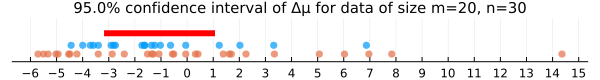

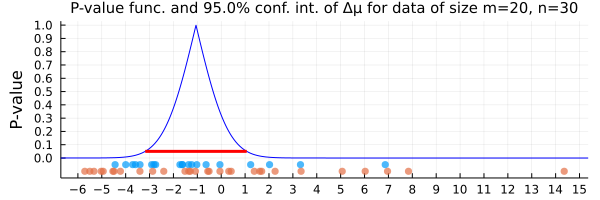

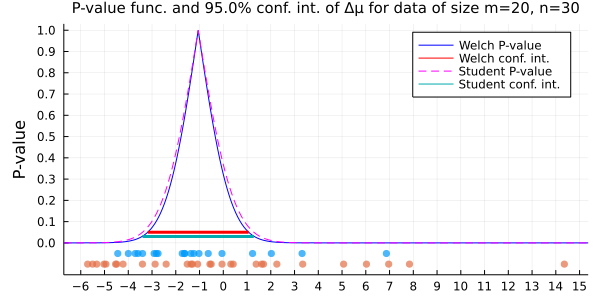

In [6]:
"""引数 x, y として平均0を持つ分布のサンプルを与えること"""
function plot_confint_of_diffmeans(x, y; α = 0.05,
        xlim = nothing, 
        plot_pvaluefunc = false,
        plot_student = false,
        xtick=-100:100, kwargs...)
    m, n = length(x), length(y)
    if isnothing(xlim)
        a, b = extrema([x; y])
        a, b = a - 0.05(b-a), b + 0.05(b-a)
    else
        a, b = xlim
    end
    if plot_pvaluefunc
        scatter(x, fill(-0.05, m); label="", msc=:auto, alpha=0.7, c=1)
        scatter!(y, fill(-0.10, n); label="", msc=:auto, alpha=0.7, c=2)
        if plot_student
            plot!(Δμ -> pvalue_welch(x, y; Δμ), a, b;
                label="Welch P-value", c=:blue)
            plot!(confint_welch(x, y; α), fill(α, 2);
                label="Welch conf. int.", lw=3, c=:red)
            plot!(Δμ -> pvalue_student(x, y; Δμ);
                label="Student P-value", ls=:dash, c=:magenta)
            plot!(confint_student(x, y; α), fill(0.03, 2);
                label="Student conf. int.", lw=3, c=6)
        else
            plot!(Δμ -> pvalue_welch(x, y; Δμ), a, b; label="", c=:blue)
            plot!(confint_welch(x, y; α), fill(α, 2); label="", lw=3, c=:red)
        end
        plot!(; ylim=(-0.15, 1.03), ytick=0:0.1:1, yguide="P-value")
        title!("P-value func. and $(100(1-α))% conf. int." *
            " of Δμ for data of size m=$m, n=$n")
        plot!(; size=(600, 200), leftmargin=4Plots.mm)
    else
        scatter(x, fill(-0.05, m); label="", msc=:auto, alpha=0.7, c=1)
        scatter!(y, fill(-0.13, n); label="", msc=:auto, alpha=0.7, c=2)
        if plot_student
            plot!(confint_welch(x, y; α), fill(0.06, 2);
                label="Welch conf. int.", lw=6, c=:red)
            plot!(confint_student(x, y; α), fill(0.06, 2);
                label="Student conf. int.", lw=6, c=:red)
        else
            plot!(confint_welch(x, y; α), fill(0.06, 2);
                label="", lw=6, c=:red)
        end
        plot!(; ylim=(-0.2, 0.2), yaxis=false, ytick=false)
        title!("$(100(1-α))% confidence interval"
            * " of Δμ for data of size m=$m, n=$n")
        plot!(; size=(600, 80))
    end
    plot!(; xlim=(a, b), xtick)
    plot!(; kwargs...)
end

x, y = rand(Gamma(3,2)-6, 20), rand(Gamma(2,3)-6, 30)
plot_confint_of_diffmeans(x, y) |> display
plot_confint_of_diffmeans(x, y; plot_pvaluefunc=true) |> display
plot_confint_of_diffmeans(x, y; 
    plot_pvaluefunc=true, plot_student=true,
    size=(600, 300))

m = 40,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 80,  μ_y = 6.000,  σ_y = 3.464,  skewness_y = 1.155,  kurtosis_y = 2.000
Δμ = 0.0
ν̄ = mean(df) = 68.32711835884052


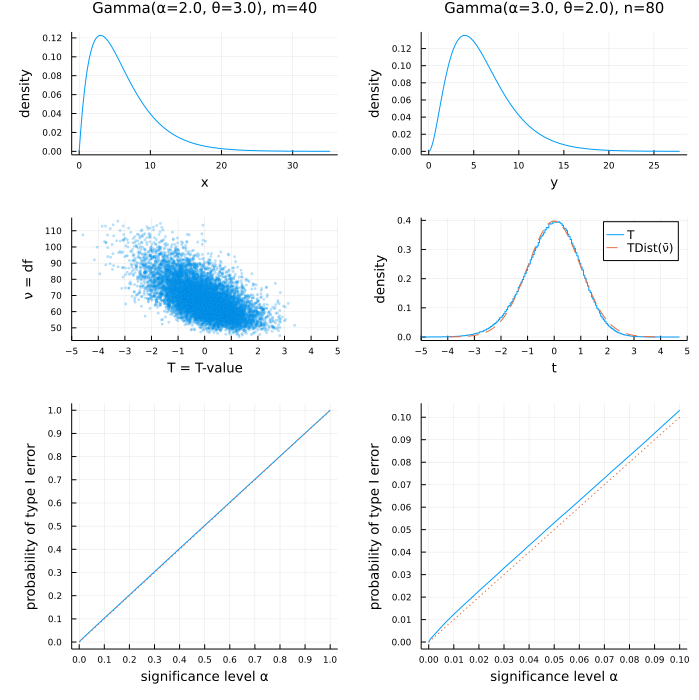

In [7]:
rd(x) = @sprintf "%.3f" x

function plot_welch(;
        distx=Normal(0,1), m=10, distxlim=nothing,
        disty=Normal(0,2), n=20, distylim=nothing,
        L=10^6, M=10^4, kwargs...)
    μ_x, σ_x = mean(distx), std(distx)
    μ_y, σ_y = mean(disty), std(disty)
    Δμ = μ_x - μ_y
    
    println("m = ", m,
        ",  μ_x = ", rd(μ_x),
        ",  σ_x = ", rd(σ_x),
        ",  skewness_x = ", rd(myskewness(distx)),
        ",  kurtosis_x = ", rd(mykurtosis(distx)))
    println("n = ", n,
        ",  μ_y = ", rd(μ_y),
        ",  σ_y = ", rd(σ_y),
        ",  skewness_y = ", rd(myskewness(disty)),
        ",  kurtosis_y = ", rd(mykurtosis(disty)))
    @show Δμ
    
    pval = similar(zeros(), L)
    T = similar(zeros(), L)
    df = similar(zeros(), L)
    tmpx = [similar(zeros(), m) for _ in 1:nthreads()]
    tmpy = [similar(zeros(), n) for _ in 1:nthreads()]
    @threads for i in 1:L
        x = rand!(distx, tmpx[threadid()])
        y = rand!(disty, tmpy[threadid()])
        pval[i] = pvalue_welch(x, y; Δμ)
        T[i] = tvalue_welch(x, y; Δμ)
        df[i] = degree_of_freedom_welch(x, y)
    end
    ecdf_pval = ecdf(pval)
    f(x) = ecdf_pval(x)
    @show ν̄ = mean(df)
    
    P1 = if isnothing(distxlim)
        plot(distx; label="", title="$(distname(distx)), m=$m")
    else
        plot(distx, distxlim...; label="", title="$(distname(distx)), m=$m")
    end
    plot!(; xguide="x", yguide="density", guidefontsize=9)
    plot!(; leftmargin=4Plots.mm)#, bottommargin=4Plots.mm)
    plot!(; tickfontsize=6)

    P2 = if isnothing(distylim)
        plot(disty; label="", title="$(distname(disty)), n=$n")
    else
        plot(disty, distylim...; label="", title="$(distname(disty)), n=$n")
    end
    plot!(; xguide="y", yguide="density", guidefontsize=9)
    plot!(; leftmargin=4Plots.mm)#, bottommargin=4Plots.mm)
    plot!(; tickfontsize=6)

    P3 = scatter(T[1:M], df[1:M]; label="", ms=1.5, msw=0, alpha=0.3)
    plot!(; xlim=(-5, 5), xtick=-5:5)
    plot!(; xguide="T = T-value", yguide="ν = df", guidefontsize=9)
    plot!(; leftmargin=4Plots.mm)#, bottommargin=4Plots.mm)
    plot!(; tickfontsize=6)
    
    P4 = stephist(T; norm=true, label="T")
    plot!(TDist(ν̄); label="TDist(ν̄)", ls=:dash)
    plot!(; xlim=(-5, 5), xtick=-5:5)
    plot!(; xguide="t", yguide="density", guidefontsize=9)
    plot!(; leftmargin=4Plots.mm)#, bottommargin=4Plots.mm)
    plot!(; tickfontsize=6)

    P5 = plot(f, 0, 1; label="")
    plot!(identity, 0, 1; label="", ls=:dot)
    plot!(; xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(; xguide="significance level α", yguide="probability of type I error",
        guidefontsize=9)
    plot!(; tickfontsize=6)
    
    P6 = plot(f, 0, 0.1; label="")
    plot!(identity, 0, 0.1; label="", ls=:dot)
    plot!(; xtick=0:0.01:1, ytick=0:0.01:1)
    plot!(; xguide="significance level α", yguide="probability of type I error",
        guidefontsize=9)
    plot!(; tickfontsize=6)

    layout = @layout [a{0.25h} b{0.25h}; c{0.25*h} d{0.25*h}; e f]
    plot(P1, P2, P3, P4, P5, P6; size=(700, 700), layout)
end

plot_welch(distx=Gamma(2,3), m=40, disty=Gamma(3,2), n=80)

m = 40,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 80,  μ_y = 6.000,  σ_y = 3.464,  skewness_y = 1.155,  kurtosis_y = 2.000
Δμ = 0.0


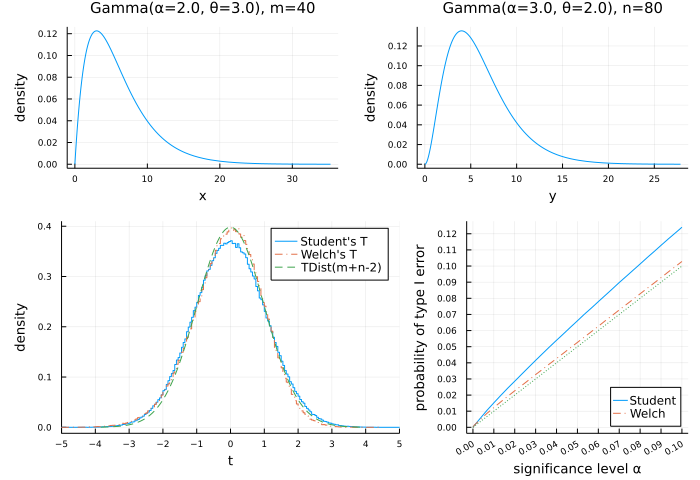

In [8]:
rd(x) = @sprintf "%.3f" x

function plot_student(;
        distx=Normal(0,1), m=10, distxlim=nothing,
        disty=Normal(0,2), n=20, distylim=nothing,
        L=10^6, M=10^4, kwargs...)
    μ_x, σ_x = mean(distx), std(distx)
    μ_y, σ_y = mean(disty), std(disty)
    Δμ = μ_x - μ_y
    
    println("m = ", m,
        ",  μ_x = ", rd(μ_x),
        ",  σ_x = ", rd(σ_x),
        ",  skewness_x = ", rd(myskewness(distx)),
        ",  kurtosis_x = ", rd(mykurtosis(distx)))
    println("n = ", n,
        ",  μ_y = ", rd(μ_y),
        ",  σ_y = ", rd(σ_y),
        ",  skewness_y = ", rd(myskewness(disty)),
        ",  kurtosis_y = ", rd(mykurtosis(disty)))
    @show Δμ
    
    pval_student = similar(zeros(), L)
    pval_welch = similar(zeros(), L)
    T_student = similar(zeros(), L)
    T_welch = similar(zeros(), L)
    tmpx = [similar(zeros(), m) for _ in 1:nthreads()]
    tmpy = [similar(zeros(), n) for _ in 1:nthreads()]
    @threads for i in 1:L
        x = rand!(distx, tmpx[threadid()])
        y = rand!(disty, tmpy[threadid()])
        pval_student[i] = pvalue_student(x, y; Δμ)
        pval_welch[i] = pvalue_welch(x, y; Δμ)
        T_student[i] = tvalue_student(x, y; Δμ)
        T_welch[i] = tvalue_welch(x, y; Δμ)
    end
    ecdf_pval_student = ecdf(pval_student)
    ecdf_pval_welch = ecdf(pval_welch)
    f_student(x) = ecdf_pval_student(x)
    f_welch(x) = ecdf_pval_welch(x)
    
    P1 = if isnothing(distxlim)
        plot(distx; label="", title="$(distname(distx)), m=$m")
    else
        plot(distx, distxlim...; label="", title="$(distname(distx)), m=$m")
    end
    plot!(; xguide="x", yguide="density", guidefontsize=9)
    plot!(; leftmargin=4Plots.mm)#, bottommargin=4Plots.mm)
    plot!(; tickfontsize=6)

    P2 = if isnothing(distylim)
        plot(disty; label="", title="$(distname(disty)), n=$n")
    else
        plot(disty, distylim...; label="", title="$(distname(disty)), n=$n")
    end
    plot!(; xguide="y", yguide="density", guidefontsize=9)
    plot!(; leftmargin=4Plots.mm)#, bottommargin=4Plots.mm)
    plot!(; tickfontsize=6)

    P4 = stephist(T_student; norm=true, label="Student's T")
    stephist!(T_welch; norm=true, label="Welch's T", ls=:dashdot)
    plot!(TDist(m+n-2); label="TDist(m+n-2)", ls=:dash)
    plot!(; xlim=(-5, 5), xtick=-5:5)
    plot!(; xguide="t", yguide="density", guidefontsize=9)
    plot!(; leftmargin=4Plots.mm)#, bottommargin=4Plots.mm)
    plot!(; tickfontsize=6)

    P6 = plot(; legend=:bottomright)
    plot!(f_student, 0, 0.1; label="Student")
    plot!(f_welch, 0, 0.1; label="Welch", ls=:dashdot)
    plot!(identity, 0, 0.1; label="", ls=:dot)
    plot!(; xtick=0:0.01:1, ytick=0:0.01:1)
    plot!(; xguide="significance level α", yguide="probability of type I error",
        guidefontsize=9)
    plot!(; tickfontsize=6, xrotation=30)

    P12 = plot(P1, P2; layout=@layout [a b])
    P46 = plot(P4, P6; layout=@layout [a{0.6w} b])
    plot(P12, P46; size=(700, 480), layout=@layout [a{0.4h}; b])
end

plot_student(distx=Gamma(2,3), m=40, disty=Gamma(3,2), n=80)

## 平均の差に関するP値と信頼区間

このノートでは2群の平均の比較に関する __Welchの t 検定__ のP値とそれに付随する信頼区間について解説する.

多くの入門的教科書では, 2群の平均の比較について, Welchの t 検定ではなく, Studentの t 検定について解説している場合が多い.

しかし, 2群の平均の比較に関するStudentの t 検定は現実の母集団について仮定するには非現実的な「等分散の仮定」を使うので頑健ではない.

昔の教科書には正規性検定と等分散検定を通過した場合にStudentの t 検定を使うように指示しているものがあるが, その方法には様々な害がある. どのような害があるかについては

* https://okumuralab.org/~okumura/stat/ttest.html

の「分散が等しいかどうか不明の場合」の節を参照せよ.

そこで, このノートでは思い切ってStudentの t 検定の解説を止めて, Welchの t 検定のみを解説することにした. 

Welchの t 検定は一定の頑健さを持っており, 母集団分布の正規性を仮定しなくても使用可能である.  (ただし, 誤差が大きくなる場合に関する注意は必要になる.)

### 平均の差に関するP値と信頼区間を使って行いたいこと

以下のようなことを行いたい.

(1) 日本にいる12歳の男子と女子をそれぞれ $m$ 人と $n$ 人無作為抽出して, 身長を測って得た数値のデータをそれぞれ $x_1,\ldots,x_m$, $y_1,\ldots,y_n$ と書くことにする.  そのようなデータを用いて日本にいる12歳の男子と女子の平均身長の差がどれだけあるか(もしくはないか)を推定したい.

(2) 薬Xの効き目を調べるために, 同一の母集団から $m+n$ 人を無作為に選んで, ランダムに選んだそのうち $m$ 人は薬Xを与え, 残りの $n$ 人にはプラセボ(偽薬)を与えた.  そして, $m+n$ 人について治療効果を表す指標の数値を測定し, 薬Xを与えた $m$ 人分の数値は $x_1,\ldots,x_m$ でプラセボを与えた $n$ 人分の数値は $y_1,\ldots,y_n$ であったとする. そのデータから, 薬Xを与えた場合の治療効果を表す指標の平均値と与えなかった場合の治療効果を表す指標の平均値の差がどうなっているかについて推定したい.

目標は2つの群の平均の差の信頼区間の構成である.

そのためには, 検定と信頼区間の表裏一体性より, P値を適切に定義すればよい.

### 平均の差の検定で使用されるP値の定義

__データ:__　$m$ 個の実数値 $x_1,\ldots,x_m$ と $n$ 個の実数値 $y_1,\ldots,y_n$.

$x_i$ 達と $y_i$ 達の標本平均と不偏分散を以下のように書くことにする:

$$
\begin{alignedat}{2}
&
\xbar = \frac{1}{m}\sum_{i=1}^m x_i, \quad
& &
s_x^2 = \frac{1}{m-1}\sum_{i=1}^m (x_i - \xbar)^2,
\\ &
\ybar = \frac{1}{n}\sum_{i=1}^n y_i, \quad
& &
s_y^2 = \frac{1}{n-1}\sum_{i=1}^m (y_i - \ybar)^2.
\end{alignedat}
$$

__統計モデル:__ 平均 $\mu_x$ と分散 $\sigma_x^2$ を持つ確率分布 $D_x$ のサイズ $m$ の標本分布 $D_x^m$ と平均 $\mu_y$ と分散 $\sigma_y^2$ を持つ確率分布 $D_y$ のサイズ $n$ の標本分布 $D_y^n$ の直積分布 $D_x^m\times D_y^n$ を統計モデルとして採用する.

以下では簡単のため $D_x$ も $D_y$ も連続分布であると仮定し, それぞれの確率密度函数を $p_x(x)$, $p_y(y)$ と書くことにする.  このとき, 統計モデル $D_x^m\times D_y^n$ の確率密度函数は

$$
p(x_1,\ldots,x_m,y_1,\ldots,y_n) = p_x(x_1)\cdots p_x(x_m)\cdot p_y(y_1)\cdots p_y(y_n)
$$

になる.  この確率分布に従う確率変数達(独立になる)を $X_1,\ldots,X_m,Y_1,\ldots,Y_n$ と書き, $X_i$ 達と $Y_i$ 達の標本平均と不偏分散を以下のように書くことにする:

$$
\begin{alignedat}{2}
&
\Xbar = \frac{1}{m}\sum_{i=1}^m X_i, \quad
& &
S_x^2 = \frac{1}{m-1}\sum_{i=1}^m (X_i - \Xbar)^2,
\\ &
\Ybar = \frac{1}{n}\sum_{i=1}^n Y_i, \quad
& &
S_y^2 = \frac{1}{n-1}\sum_{i=1}^m (Y_i - \Ybar)^2.
\end{alignedat}
$$

__この統計モデルが適用可能な場合:__ 上の統計モデルでは, データの数値 $x_i$, $y_i$ の生成のされ方のモデル化である $X_i$, $Y_i$ 達が独立な確率変数になっており, $X_i$ 達は同じ分布に従い, $Y_i$ 達も同じ分布に従うが, $X_i$ 達と $Y_i$ 達が従う分布は違っていてよいという設定になっている.  データの生成のされ方がこの条件を満たしていない場合には, 上の統計モデルの適用は不適切になる.

例えば, $m=n$ でデータ中の $x_i$ の値と $y_i$ の値が関係している場合には上のモデルの使用は不適切になる.  例えば, $i$ 番目の人の薬を与える前の数値が $x_i$ で薬を与えた後の数値が $y_i$ の場合には $y_i$ の値は $x_i$ の値に依存して決まるので, このような場合に上のモデルの適用は不適切になる. そのような場合には, 例えばそれらの差に平均の値に関する検定や信頼区間を使用すればよい.

__検定したい仮説:__　$\mu_x - \mu_y = \dmu$　($\dmu$ は具体的な数値).

__中心極限定理:__ モデル内確率変数としての2つの標本平均達の分布について, 中心極限定理による正規分布近似が使えると仮定する.

$\Xbar$, $\Ybar$ の平均(期待値)と分散は以下のようになる:

$$
E[\Xbar] = \mu_x, \quad
E[\Ybar] = \mu_y, \quad
\var(\Xbar) = \frac{\sigma_x^2}{m}, \quad
\var(\Ybar) = \frac{\sigma_y^2}{n}.
$$

さらに, $\Xbar$ と $\Ybar$ が確率変数として独立であることより,

$$
E[\Xbar - \Ybar] = \mu_x - \mu_y, \quad
\var(\Xbar - \Ybar) = \frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}.
$$

さらに, 中心極限定理より, 次の近似が使える:

$$
\Xbar - \Ybar \sim
\Normal\left(\mu_x - \mu_y,\; \sqrt{\frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}}\right),
\quad\text{approximately}.
$$

すなわち,

$$
\frac
{(\Xbar - \Ybar) - (\mu_x - \mu_y)}
{\ds \sqrt{\frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}}} \sim \Normal(0,1),
\quad\text{approximately}.
$$

__大数の法則:__ モデル内確率変数としての不偏分散 $S_x^2$, $S_y^2$ でモデルの分散 $\sigma_x^2$, $\sigma_y^2$ がよく近似されていると仮定する.

このとき, 次の近似が使える.

$$
T :=
\frac
{(\Xbar - \Ybar) - (\mu_x - \mu_y)}
{\ds \sqrt{\frac{S_x^2}{m} + \frac{S_y^2}{n}}} \sim \Normal(0,1),
\quad\text{approximately}.
$$

__P値の定義:__ これを用いて, 具体的に与えられた数値 $\dmu$ に関する仮説「$\mu_x - \mu_y = \dmu$」のP値を以下のように定義する.  まず, データの数値の $t$ 値 $t=t(\dmu)$ を次のように定義する: 

$$
t = t(\dmu) =
\frac
{(\xbar - \ybar) - \dmu}
{\ds \sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}}}.
$$

仮説「$\mu_x - \mu_y = \dmu$」のP値を, その仮説下のモデル内の確率変数としての $t$ 値 $T$ の値の絶対値がデータから計算した $t$ 値 $t=t(\dmu)$ の絶対値以上になる確率の近似値として定義する:

$$
\pvalue_{\Normal}(\xbar, \ybar, s_x^2, s_y^2|m,n, \mu_x-\mu_y=\dmu) =
2(1-\cdf(\Normal(0,1), |t(\dmu)|)).
$$

しかし, 実際に使用されるのは次に定義する $t$ 分布を使って定義されたP値の方である.

__t分布を使って補正されたP値の定義:__ 上のP値の $t$ 分布版を定義しよう.

天下り的になってしまうが, 自由度 $\nu$ を次のように定義する(これの導出は別の節で行う):

$$
\nu =
\frac
{\ds \left(s_x^2/m + s_y^2/n\right)^2}
{\ds \frac{(s_x^2/m)^2}{m-1} + \frac{(s_y^2/n)^2}{n-1}}.
$$

仮に $s_x^2=s_y^2$, $m=n$ だとすると, $\nu = 2n-2$ となる. 

一般にこの $\nu$ は整数にならないがそのまま用いる.

この $\nu$ を用いて $t$ 分布を使って計算されるP値を次のように定める:

$$
\pvalue_{\Welch}(\xbar, \ybar, s_x^2, s_y^2|m,n, \mu_x-\mu_y=\dmu) =
2(1-\cdf(\TDist(\nu), |t(\dmu)|)).
$$

以下ではこれを使うことにする. このP値は __Welchの t 検定__ のP値である.

$\nu$ の定義を覚える必要はない.  $m,n$ が大きいならば, $\nu$ も大きくなり, 自由度 $\nu$ の $t$ 分布 $\TDist(\nu)$ は標準正規分布 $\Normal(0,1)$ でよく近似されるようになるので, $\nu$ の値がどうであるかを実質的に気にする必要がなくなることにも注意せよ.  この $t$ 分布による補正が有効なのは特別な場合に限るが, 有効でない場合にも害はないのでこちらの方を使うことにする.

__信頼区間:__ Welchの $t$ 検定のP値から定まる信頼区間は以下のように書ける.

まず, 自由度 $\nu$ の $t$ 分布において $t_{\nu,\alpha/2}$ 以上になる確率は $\alpha/2$ になると仮定する:

$$
t_{\nu,\alpha/2} = \quantile(\TDist(\nu), 1 - \alpha/2).
$$

このとき, 平均の差 $\mu_x-\mu_y$ の信頼度 $1-\alpha$ の信頼区間が次のように定義される:

$$
\begin{aligned}
&
\confint_{\Welch}(\xbar, \ybar, s_x^2, s_y^2|m,n,\alpha)
\\ &=
\left[
\xbar - \ybar - t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}},\;
\xbar - \ybar + t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}}\;
\right].
\end{aligned}
$$

## データサイズを大きくしたときの信頼区間の収束の視覚化

In [9]:
# テストデータの生成
# 後で使う函数との相性で平均が0の分布で標本を生成する必要がある.

Random.seed!(845145105963) # はよこい しごと ごくろうさん
distx, disty = Gamma(2,1), Gamma(5,1) 
distx, disty = distx-mean(distx), disty-mean(disty) 
x = rand(distx, 320)
y = rand(disty, 640)
a, b = extrema([x; y])
xlim = (a - 0.05(b - a), b + 0.05(b-a))

(-4.849858804201334, 10.08008066780289)

### 信頼区間のみを静的にプロット

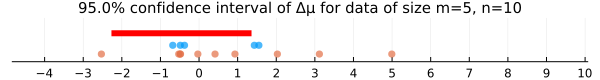

In [10]:
plot_confint_of_diffmeans(x[1:5], y[1:10]; xlim)

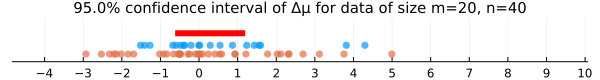

In [11]:
plot_confint_of_diffmeans(x[1:20], y[1:40]; xlim)

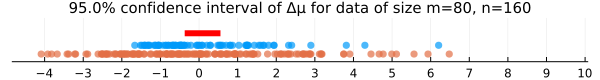

In [12]:
plot_confint_of_diffmeans(x[1:80], y[1:160]; xlim)

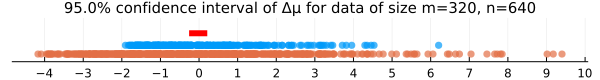

In [13]:
plot_confint_of_diffmeans(x[1:320], y[1:640]; xlim)

### 信頼区間とP値函数を同時に静的にプロット

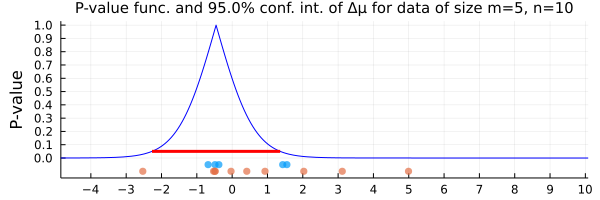

In [14]:
plot_confint_of_diffmeans(x[1:5], y[1:10]; xlim, plot_pvaluefunc=true)

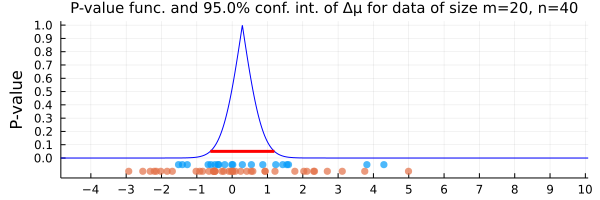

In [15]:
plot_confint_of_diffmeans(x[1:20], y[1:40]; xlim, plot_pvaluefunc=true)

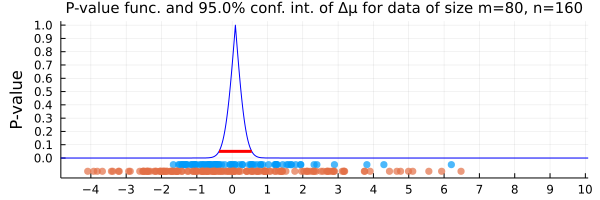

In [16]:
plot_confint_of_diffmeans(x[1:80], y[1:160]; xlim, plot_pvaluefunc=true)

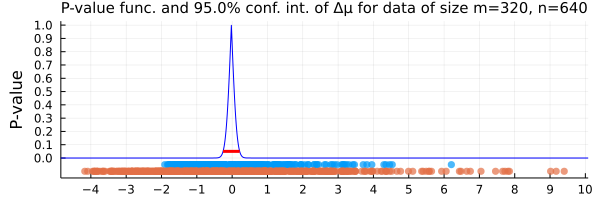

In [17]:
plot_confint_of_diffmeans(x[1:320], y[1:640]; xlim, plot_pvaluefunc=true)

### 動画

┌ Info: Saved animation to 
│   fn = D:\OneDrive\work\Statistics\2022\images\confint_of_diffmeans.gif
└ @ Plots D:\.julia\packages\Plots\Ra8fG\src\animation.jl:126


Plots.AnimatedGif("D:\\OneDrive\\work\\Statistics\\2022\\images\\confint_of_diffmeans.gif")
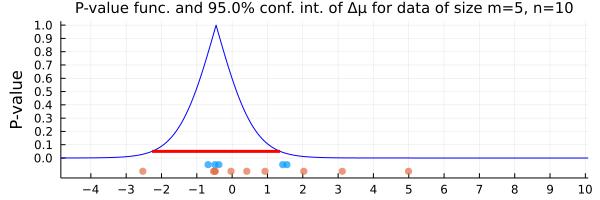

In [18]:
L = length(x)
anim = @animate for m in [fill(5, 20); 10:L; fill(L, 20)]
    plot_confint_of_diffmeans(x[1:m], y[1:2m]; xlim, plot_pvaluefunc=true)
end
gif(anim, "images/confint_of_diffmeans.gif")

このノートのPDF版で上の動画をみることはできない. しかし, 以下の場所でみることができる:

* https://github.com/genkuroki/Statistics/blob/master/2022/images/confint_of_diffmeans.gif

## Welchの t 検定のP値と信頼区間の計算例

### 必修問題: Welchの t 検定のP値と信頼区間の計算

サイズが $m = 20$, $n = 30$ のデータ

```
x = [19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9,
    11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6]

y = [44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7,
    74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7,
    124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4]
```

について以下を求めよ.

(1) 仮説 $\mu_x - \mu_y = 0$ のP値.

(2) 仮説 $\mu_x - \mu_y = -30$ のP値.

(3) Welchの $t$ 検定に付随する $95\%$ 信頼区間.

#### WolframAlphaによるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例

`mean {19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9, 11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6}` → [実行](https://www.wolframalpha.com/input?i=mean+%7B19.2%2C+22.7%2C+7.8%2C+138.5%2C+70.5%2C+44.3%2C+84.0%2C+35.6%2C+72.4%2C+23.9%2C+11.7%2C+26.6%2C+73.8%2C+118.3%2C+54.2%2C+57.6%2C+40.5%2C+117.4%2C+102.3%2C+67.6%7D) → 59.445 $= \xbar$

`var {19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9, 11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6}` → [実行](https://www.wolframalpha.com/input?i=var+%7B19.2%2C+22.7%2C+7.8%2C+138.5%2C+70.5%2C+44.3%2C+84.0%2C+35.6%2C+72.4%2C+23.9%2C+11.7%2C+26.6%2C+73.8%2C+118.3%2C+54.2%2C+57.6%2C+40.5%2C+117.4%2C+102.3%2C+67.6%7D) → 1448.48 $= s_x^2$

`mean {44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7, 74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7, 124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4}` → [実行](https://www.wolframalpha.com/input?i=mean+%7B44.3%2C+66.9%2C+62.9%2C+78.4%2C+71.2%2C+32.5%2C+111.4%2C+38.2%2C+68.2%2C+50.7%2C+74.5%2C+46.2%2C+65.7%2C+58.7%2C+42.5%2C+57.4%2C+63.0%2C+67.9%2C+72.1%2C+117.7%2C+124.1%2C+48.9%2C+91.8%2C+80.8%2C+60.2%2C+76.8%2C+76.3%2C+59.9%2C+70.7%2C+46.4%7D) → 67.5433 $= \ybar$

`var {44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7, 74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7, 124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4}` → [実行](https://www.wolframalpha.com/input?i=var+%7B44.3%2C+66.9%2C+62.9%2C+78.4%2C+71.2%2C+32.5%2C+111.4%2C+38.2%2C+68.2%2C+50.7%2C+74.5%2C+46.2%2C+65.7%2C+58.7%2C+42.5%2C+57.4%2C+63.0%2C+67.9%2C+72.1%2C+117.7%2C+124.1%2C+48.9%2C+91.8%2C+80.8%2C+60.2%2C+76.8%2C+76.3%2C+59.9%2C+70.7%2C+46.4%7D) → 479.481 $= s_y^2$

`(v/m+w/n)^2/((v/m)^2/(m-1)+(w/n)^2/(n-1)) where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%28v%2Fm%2Bw%2Fn%29%5E2%2F%28%28v%2Fm%29%5E2%2F%28m-1%29%2B%28w%2Fn%29%5E2%2F%28n-1%29%29+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → 27.4358 $=\nu$ (自由度)

(1)

`(x-y-0)/sqrt(v/m+w/n) where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%28x-y-0%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → -0.861294 $=t$ (t値)

`2(1 - cdf(TDistribution(27.4358), 0.861294))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%2827.4358%29%2C+0.861294%29%29) → 0.396541 ((1)のP値)

(2)

`(x-y+30)/sqrt(v/m+w/n) where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%28x-y%2B30%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → 2.32935 $=t$ (t値)

`2(1 - cdf(TDistribution(27.4358), 2.32935))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%2827.4358%29%2C+2.32935%29%29) → 0.0274389 ((2)のP値)

(3)

`quantile(TDistribution(27.4358), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28TDistribution%2827.4358%29%2C+0.975%29) → 2.05031 $=t_{\nu,\alpha/2}$

`{x-y-2.05031*sqrt(v/m+w/n), x-y+2.05031*sqrt(v/m+w/n)} where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%7Bx-y-2.05031*sqrt%28v%2Fm%2Bw%2Fn%29%2C+x-y%2B2.05031*sqrt%28v%2Fm%2Bw%2Fn%29%7D+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → {-27.3763, 11.1797} ((3)の信頼区間)

#### Julia言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例

函数の定義についてはこのノートの最初の方を見よ.

In [19]:
x = [19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9,
    11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6]
y = [44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7,
    74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7,
    124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4]
@show length(x)
@show mean(x)
@show std(x)
@show length(y)
@show mean(y)
@show std(y)
@show degree_of_freedom_welch(x, y);

length(x) = 20
mean(x) = 59.44499999999999
std(x) = 38.05893594496774
length(y) = 30
mean(y) = 67.54333333333334
std(y) = 21.897058270907998
degree_of_freedom_welch(x, y) = 27.43582631782945


In [20]:
# (1)
@show tvalue_welch(x, y; Δμ = 0)
@show pvalue_welch(x, y; Δμ = 0);

tvalue_welch(x, y; Δμ = 0) = -0.8612965858138025
pvalue_welch(x, y; Δμ = 0) = 0.39653998689489345


In [21]:
# (2)
@show tvalue_welch(x, y; Δμ = -30)
@show pvalue_welch(x, y; Δμ = -30);

tvalue_welch(x, y; Δμ = -30) = 2.3293472801356576
pvalue_welch(x, y; Δμ = -30) = 0.027439073239531347


In [22]:
# (3)
@show confint_welch(x, y; α=0.05);

confint_welch(x, y; α = 0.05) = [-27.376321534615272, 11.179654867948585]


#### Julia言語による必修問題のデータの視覚化

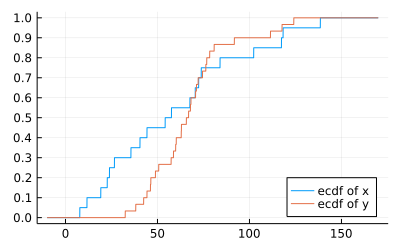

In [23]:
ecdf_x, ecdf_y = ecdf(x), ecdf(y)
plot(; legend=:bottomright, ytick=0:0.1:1)
plot!(x -> ecdf_x(x), -10, 170; label="ecdf of x")
plot!(x -> ecdf_y(x), -10, 170; label="ecdf of y")

$x$ に対してデータ中の $x$ 以下の要素の個数の割合を対応させる函数をデータの経験累積分布函数(empirical cumulative distribution function, ecdf)と呼ぶ.  上のグラフはデータ $x,y$ の経験累積分布函数のプロットである.

経験分布函数のプロットには, ヒストグラムと違って, ビン(横軸の分割)の仕方に神経を使わずにプロットしても問題がないという利点がある.  欠点は直観的に意味を把握できず, 少し考えなければグラフを適切に解釈できないことである.

上のecdf達のグラフからデータxはデータyよりも広く分布していることがわかる.

#### Julia言語による必修問題のP値函数の視覚化

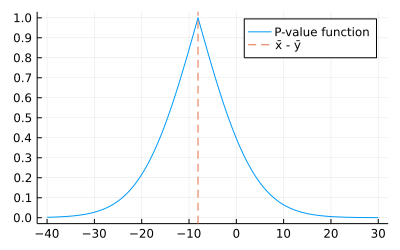

In [24]:
plot(Δμ -> pvalue_welch(x, y; Δμ), -40, 30; label="P-value function")
vline!([mean(x)-mean(y)]; label="x̄ - ȳ", ls=:dash)
plot!(; xtick=-100:10:100, ytick=0:0.1:1)

#### R言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例



In [25]:
# (1), (3)
@rput x y
R"""t.test(x, y)"""

RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = -0.8613, df = 27.436, p-value = 0.3965
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -27.37632  11.17965
sample estimates:
mean of x mean of y 
 59.44500  67.54333 



In [26]:
# (2), (3)
R"""t.test(x, y, mu=-30)"""

RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = 2.3293, df = 27.436, p-value = 0.02744
alternative hypothesis: true difference in means is not equal to -30
95 percent confidence interval:
 -27.37632  11.17965
sample estimates:
mean of x mean of y 
 59.44500  67.54333 



#### Welchの t 検定のP値と信頼区間の計算の必修問題の解答例

(1) 0.3965

(2) 0.02744

(3) \[-27.38, 11.18\]

### 必修問題: 12歳の男子と女子の平均身長の差

[国民健康・栄養調査14 身長・体重の平均値及び標準偏差](https://www.e-stat.go.jp/dbview?sid=0003224177)における2012年と2018年の12歳の男女のデータによれば, 男子 $m$ 人の身長のデータの標本平均 $\xbar$ と標本分散の平方根 $s_x$ と女子 $n$ 人の身長のデータの標本平均 $\ybar$ と不偏分散の平方根 $s_y$ は以下の値になった.

$$
\begin{array}{|c|r|c|c|r|c|c|}
\hline
& m & \xbar & s_x & n & \ybar & s_y \\
\hline
2012 & 111 & 149.9\op{cm} & 7.1\op{cm} & 131 & 151.1\op{cm} & 6.3\op{cm} \\
\hline
2018 &  31 & 153.1\op{cm} & 7.9\op{cm} &  19 & 150.1\op{cm} & 5.7\op{cm} \\
\hline
\end{array}
$$

このデータについて以下を計算せよ:

(1) 2012年のデータについて, 仮説「平均の差は $\mu_x - \mu_y = 0$ である」に関するWelchの $t$ 検定のP値.

(2) 2012年のデータについて, 平均の差 $\mu_x - \mu_y$ に関するWelchの $t$ 検定に付随する $95\%$ 信頼区間.

(3) 2018年のデータについて, 仮説「平均の差は $\mu_x - \mu_y = 0$ である」に関するWelchの $t$ 検定のP値.

(4) 2018年のデータについて, 平均の差 $\mu_x - \mu_y$ に関するWelchの $t$ 検定に付随する $95\%$ 信頼区間.

(5) 信頼区間の幅がどのようにどのような理由で変わったか?

#### WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例

以下 $\xbar, s_x^2, \ybar, s_y^2$ をそれぞれ `x`, `v`, `y`, `w` と書く.

(1)

`(x-y)/sqrt(v/m+w/n) where {m=111 x=149.9, v=7.1^2, n=131, y=151.1, w=6.3^2}` → [実行](https://www.wolframalpha.com/input?i=%28x-y%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D111+x%3D149.9%2C+v%3D7.1%5E2%2C+n%3D131%2C+y%3D151.1%2C+w%3D6.3%5E2%7D) → -1.37911 $=t$ (t値)

`(v/m+w/n)^2/((v/m)^2/(m-1)+(w/n)^2/(n-1)) where {m=111 x=149.9, v=7.1^2, n=131, y=151.1, w=6.3^2}` → [実行](https://www.wolframalpha.com/input?i=%28v%2Fm%2Bw%2Fn%29%5E2%2F%28%28v%2Fm%29%5E2%2F%28m-1%29%2B%28w%2Fn%29%5E2%2F%28n-1%29%29+where+%7Bm%3D111+x%3D149.9%2C+v%3D7.1%5E2%2C+n%3D131%2C+y%3D151.1%2C+w%3D6.3%5E2%7D) → 222.089 $=\nu$ (自由度)

`2(1 - cdf(TDistribution(222.089), 1.37911))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%28222.089%29%2C+1.37911%29%29) → 0.169248 (P値)

(2)

`quantile(TDistribution(222.089), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28TDistribution%28222.089%29%2C+0.975%29) → 1.9707 $=t_{\nu,\alpha/2}$

`{x-y-1.9707*sqrt(v/m+w/n), x-y+1.9707*sqrt(v/m+w/n)} where {m=111 x=149.9, v=7.1^2, n=131, y=151.1, w=6.3^2}` → [実行](https://www.wolframalpha.com/input?i=%7Bx-y-1.9707*sqrt%28v%2Fm%2Bw%2Fn%29%2C+x-y%2B1.9707*sqrt%28v%2Fm%2Bw%2Fn%29%7D+where+%7Bm%3D111+x%3D149.9%2C+v%3D7.1%5E2%2C+n%3D131%2C+y%3D151.1%2C+w%3D6.3%5E2%7D) → {-2.91476, 0.51476} (95%信頼区間)

(3)

`(x-y)/sqrt(v/m+w/n) where {m=31, x=153.1, v=7.9^2, n=19, y=150.1, w=5.7^2}` → [実行](https://www.wolframalpha.com/input?i=%28x-y%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D31%2C+x%3D153.1%2C+v%3D7.9%5E2%2C+n%3D19%2C+y%3D150.1%2C+w%3D5.7%5E2%7D) → 1.55475 $=t$ (t値)

`(v/m+w/n)^2/((v/m)^2/(m-1)+(w/n)^2/(n-1)) where {m=31, x=153.1, v=7.9^2, n=19, y=150.1, w=5.7^2}` → [実行](https://www.wolframalpha.com/input?i=%28v%2Fm%2Bw%2Fn%29%5E2%2F%28%28v%2Fm%29%5E2%2F%28m-1%29%2B%28w%2Fn%29%5E2%2F%28n-1%29%29+where+%7Bm%3D31%2C+x%3D153.1%2C+v%3D7.9%5E2%2C+n%3D19%2C+y%3D150.1%2C+w%3D5.7%5E2%7D) → 46.5881 $=\nu$ (自由度)

`2(1 - cdf(TDistribution(46.5881), 1.55475))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%2846.5881%29%2C+1.55475%29%29) → 0.126773 (P値)

(4)

`quantile(TDistribution(46.5881), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28TDistribution%2846.5881%29%2C+0.975%29) → 2.01221 $=t_{\nu,\alpha/2}$

`{x-y-2.01221*sqrt(v/m+w/n), x-y+2.01221*sqrt(v/m+w/n)} where {m=31, x=153.1, v=7.9^2, n=19, y=150.1, w=5.7^2}` → [実行](https://www.wolframalpha.com/input?i=%7Bx-y-2.01221*sqrt%28v%2Fm%2Bw%2Fn%29%2C+x-y%2B2.01221*sqrt%28v%2Fm%2Bw%2Fn%29%7D+where+%7Bm%3D31%2C+x%3D153.1%2C+v%3D7.9%5E2%2C+n%3D19%2C+y%3D150.1%2C+w%3D5.7%5E2%7D) → {-0.882692, 6.88269} (95%信頼区間)

#### Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例

函数の定義についてはこのノートの最初の方を見よ.

In [27]:
# (1), (2)
m, x̄, sx² = 111, 149.9, 7.1^2
n, ȳ, sy² = 131, 151.1, 6.3^2
@show tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show degree_of_freedom_welch(m, sx², n, sy²)
@show pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05);

tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = -1.3791088014266908
degree_of_freedom_welch(m, sx², n, sy²) = 222.08949764026912
pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 0.16924845911510278
confint_welch(m, x̄, sx², n, ȳ, sy²; α = 0.05) = [-2.914762206412952, 0.5147622064129749]


In [28]:
# (3), (4)
m, x̄, sx² = 31, 153.1, 7.9^2
n, ȳ, sy² = 19, 150.1, 5.7^2
@show tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show degree_of_freedom_welch(m, sx², n, sy²)
@show pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05);

tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 1.5547535841186384
degree_of_freedom_welch(m, sx², n, sy²) = 46.58809963805082
pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 0.12677251777391707
confint_welch(m, x̄, sx², n, ȳ, sy²; α = 0.05) = [-0.8826927055711793, 6.882692705571179]


####  Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化

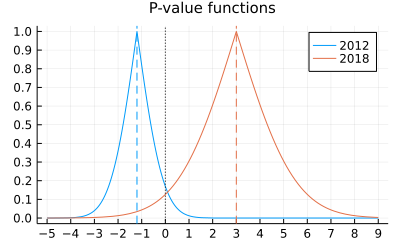

In [29]:
plot()
m, x̄, sx² = 111, 149.9, 7.1^2
n, ȳ, sy² = 131, 151.1, 6.3^2
plot(Δμ -> pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ), -5, 9; label="2012", c=1)
vline!([x̄-ȳ]; label="", ls=:dash, c=1)
m, x̄, sx² = 31, 153.1, 7.9^2
n, ȳ, sy² = 19, 150.1, 5.7^2
plot!(Δμ -> pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ), -5, 9; label="2018", c=2)
vline!([x̄-ȳ]; label="", ls=:dash, c=2)
plot!(; xtick=-100:1:100, ytick=0:0.1:1)
vline!([0]; label="", ls=:dot, c=:black)
title!("P-value functions")

#### R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例

以下のように与えられた $m, \xbar, s_x^2$ に対して, そのような標本平均と不偏分散を持つ擬似的なデータを構成すれば `t.test` 函数で容易に計算できる.

In [30]:
function fakedata(m, x̄, sx²)
    if isodd(m)
        [(x̄ + (-1)^k*√sx² for k in 1:m-1)...; x̄]
    else
        [(x̄ + (-1)^k*√sx² for k in 1:m-2)...; x̄-√(sx²/2); x̄+√(sx²/2)]
    end
end

@show x = fakedata(7, 10, 3^2)
@show length(x), mean(x), std(x)
println()
@show x = fakedata(6, 10, 3^2)
@show length(x), mean(x), std(x);

x = fakedata(7, 10, 3 ^ 2) = [7.0, 13.0, 7.0, 13.0, 7.0, 13.0, 10.0]
(length(x), mean(x), std(x)) = (7, 10.0, 3.0)

x = fakedata(6, 10, 3 ^ 2) = [7.0, 13.0, 7.0, 13.0, 7.878679656440358, 12.121320343559642]
(length(x), mean(x), std(x)) = (6, 10.0, 3.0)


In [31]:
# (1), (2)
m, x̄, sx² = 111, 149.9, 7.1^2
n, ȳ, sy² = 131, 151.1, 6.3^2
x = fakedata(m, x̄, sx²)
y = fakedata(n, ȳ, sy²)
@show length(x), mean(x), std(x)
@show length(y), mean(y), std(y)
@rput x y
R"""
t.test(x, y, conf.level=0.95)
"""

(length(x), mean(x), std(x)) = (111, 149.89999999999998, 7.099999999999997)
(length(y), mean(y), std(y)) = (131, 151.1, 6.300000000000011)


RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = -1.3791, df = 222.09, p-value = 0.1692
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.9147622  0.5147622
sample estimates:
mean of x mean of y 
    149.9     151.1 



In [32]:
# (3), (4)
m, x̄, sx² = 31, 153.1, 7.9^2
n, ȳ, sy² = 19, 150.1, 5.7^2
x = fakedata(m, x̄, sx²)
y = fakedata(n, ȳ, sy²)
@show length(x), mean(x), std(x)
@show length(y), mean(y), std(y)
@rput x y
R"""
t.test(x, y, conf.level=0.95)
"""

(length(x), mean(x), std(x)) = (31, 153.1, 7.900000000000006)
(length(y), mean(y), std(y)) = (19, 150.1, 5.699999999999989)


RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = 1.5548, df = 46.588, p-value = 0.1268
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8826927  6.8826927
sample estimates:
mean of x mean of y 
    153.1     150.1 



#### 12歳の男子と女子の平均身長の差に関する必修問題の解答例

(1) 0.1692

(2) \[-2.9148, 0.5148\]

(3) 0.1268

(4) \[-0.8827, 6.8827\]

(5) 後者の信頼区間の幅の方がかなり広くなっている.  その理由はデータのサイズの違いになると考えられる.  前者の2012年のデータは男子111人と女子131人のデータだったが, 後者の2018年のデータは男子31人と女子19人のデータだった.

__注意:__ このことから, データの要約値を報告する場合には必ずデータのサイズの情報も報告する必要があることがわかる.

__注意:__ 以上の計算結果は通常「そのデータだけからは, 2012年と2018年における12歳の男子と女子の平均身長に差があるかどうかは分からない」と解釈される.

#### 仮に2012年のデータのサンプルサイズだけが実際のサイズの2倍だったとしたら

仮に2012年のデータのサンプルサイズだけが実際のサイズの2倍ならば(すなわち $m,n$ が実際のサイズ $m=31$, $n=19$ の2倍だったならば), 「男女の平均の差は $0$ である」という仮説のP値は約 $13\%$ から約 $3\%$ に下がり, 信頼区間の幅も狭くなる.

サンプルサイズはデータに関する最も重要な情報になる.

In [33]:
# 2012年のデータのサンプルサイズだけが実際のデータの2倍だった場合
m, x̄, sx² = 31*2, 153.1, 7.9^2
n, ȳ, sy² = 19*2, 150.1, 5.7^2
@show tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show degree_of_freedom_welch(m, sx², n, sy²)
@show pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05);

tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 2.1987536048087573
degree_of_freedom_welch(m, sx², n, sy²) = 95.29156620713648
pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 0.03031571373213725
confint_welch(m, x̄, sx², n, ȳ, sy²; α = 0.05) = [0.291411840600591, 5.708588159399409]


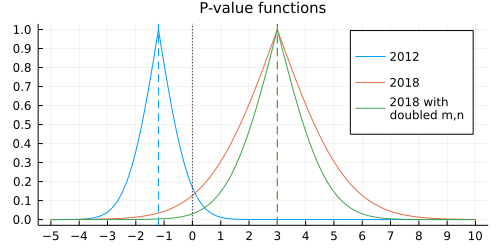

In [34]:
plot()
m, x̄, sx² = 111, 149.9, 7.1^2
n, ȳ, sy² = 131, 151.1, 6.3^2
plot(Δμ -> pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ), -5, 10;
    label="2012", c=1)
vline!([x̄-ȳ]; label="", ls=:dash, c=1)
m, x̄, sx² = 31, 153.1, 7.9^2
n, ȳ, sy² = 19, 150.1, 5.7^2
plot!(Δμ -> pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ), -5, 10;
    label="2018", c=2)
vline!([x̄-ȳ]; label="", ls=:dash, c=2)
m, x̄, sx² = 31*2, 153.1, 7.9^2
n, ȳ, sy² = 19*2, 150.1, 5.7^2
plot!(Δμ -> pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ), -5, 10;
    label="2018 with\ndoubled m,n", c=3)
vline!([x̄-ȳ]; label="", ls=:dash, c=3)
plot!(; xtick=-100:1:100, ytick=0:0.1:1)
vline!([0]; label="", ls=:dot, c=:black)
title!("P-value functions")
plot!(;size=(500, 250))#, legend=:outertopright)

## Welchの t 検定で使う自由度の式の導出

Welchのt検定の原論文:

* B. L. Welch, The Significance of the Difference Between Two Means when the Population Variances are Unequal, Biometrika, Vol. 29, No. 3/4 (Feb., 1938), pp. 350-362. \[[Google Scholar](https://scholar.google.co.jp/scholar?cluster=10421437430510190115)\]

Welchのt検定で使用される自由度は非常に大雑把な近似を使って導出される.

データサイズが十分に大きな場合には, 自由度が大きな $t$ 分布は標準正規分布でよく近似されるので, Welchの自由度の $t$ 分布を使った補正は実践的には意味がなくなる.  例えば $m$, $n$ が $100$ 程度以上のデータを扱う場合には, 以下の複雑な近似の過程をフォローしても益がない.

だから, この節は後の方に回されることになった.

しかし, Welchによる $t$ 分布を使った補正は __Brunner-Munzel 検定__ のような他の検定法でも使われているので, 興味がある人はフォローしておくとよいだろう.

* Edgar Brunner and Ullrich Munzel, The Nonparametric Behrens-Fisher Problem: Asymptotic Theory and a Small-Sample Approximation, Biometrical Journal, Volume42, Issue1, January 2000, Pages 17-25. \[[Google Scholar](https://scholar.google.com/scholar?cluster=5072504718959959846)\]

以下で紹介する議論をフォローできた人はこの Brunner-Munzel (2000)にも挑戦してみると良いかもしれない.

### 2つの正規分布の標本分布の設定

$X_1,\ldots,X_m$ は各々が平均 $\mu_x$ と分散 $\sigma_x^2$ を持つ __正規分布__ に従う独立同分布な確率変数達であると仮定する. 

$Y_1,\ldots,Y_n$ は各々が平均 $\mu_y$ と分散 $\sigma_y^2$ を持つ __正規分布__ に従う独立同分布な確率変数達であると仮定する. 

$X_i$, $Y_j$ の全体も独立であると仮定する.

$X_1,\ldots,X_m$ の不偏分散を $S_x^2$ と書き, $Y_1,\ldots,Y_n$ の不偏分散を $S_y^2$ と書くことにする.

このとき, 正規分布の標本分布に関する一般論より, 次が成立している:

$$
\frac{(m-1)S_x^2}{\sigma_x^2} \sim \Chisq(m-1), \quad
\frac{(n-1)S_y^2}{\sigma_y^2} \sim \Chisq(n-1).
$$

$S_x^2$ と $S_y^2$ も独立になることに注意せよ.  正規分布の標本分布に関する一般論については

* [「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb)

における「正規分布の標本分布の場合」の節を参照せよ. ゆえに

$$
S_\Delta^2 :=
\frac{S_x^2}{m} + \frac{S_y^2}{n} \sim
\frac{\sigma_x^2}{m}\frac{\Chisq(m-1)}{m-1} +
\frac{\sigma_y^2}{n}\frac{\Chisq(n-1)}{n-1}.
$$

$\Chisq(\nu)$ の平均と分散はそれぞれ $\nu$, $2\nu$ なので, 上のように $S_\Delta^2$ とおくと,

$$
\begin{aligned}
E[S_\Delta^2] &= \frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n},
\\
\var(S_\Delta^2) &=
\left(\frac{\sigma_x^2}{m}\right)^2\frac{2}{m-1} +
\left(\frac{\sigma_y^2}{n}\right)^2\frac{2}{n-1}
\\ &=
2\left(\frac{(\sigma_x^2/m)^2}{m-1} + \frac{(\sigma_y^2/n)^2}{n-1}\right).
\end{aligned}
$$

### χ²分布で近似することによる自由度の式の導出

$S_\Delta^2$ の分布を近似するχ²分布の定数倍 $a\Chisq(\nu)$ を求めたい. そのために, χ²分布の定数倍 $a\Chisq(\nu)$ が $S_\Delta^2$ と同じ平均と分散を持つような正定数 $a$ と自由度 $\nu$ を求めよう.

その条件は $a$ と $\nu$ に関する次の連立方程式になる:

$$
\begin{aligned}
&
a\nu = (\text{$a\Chisq(\nu)$ の平均}) =
E[S_\Delta^2] = \frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n},
\\ &
2a^2\nu = (\text{$a\Chisq(\nu)$ の分散}) =
\var(S_\Delta^2) =
2\left(\frac{(\sigma_x^2/m)^2}{m-1} + \frac{(\sigma_y^2/n)^2}{n-1}\right).
\end{aligned}
$$

この方程式を満たす $a$ は後者の式の両辺を $2$ で割って, さらに前者の式の両辺で割れば容易に得られる. この方程式を満たす $\nu$ はそうやって求めた $a$ を前者に代入すれば得られる.  その結果は次の通り:

$$
a = \frac
{\ds \frac{(\sigma_x^2/m)^2}{m-1} + \frac{(\sigma_y^2/n)^2}{n-1}}
{\ds \frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}}, \quad
\nu = \frac
{\ds \left(\frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}\right)^2}
{\ds \frac{(\sigma_x^2/m)^2}{m-1} + \frac{(\sigma_y^2/n)^2}{n-1}}.
$$

$S_\Delta^2$ と同じ平均と分散を持つχ²分布の定数倍における自由度はこの $\nu$ になる. 

この $\nu$ の値の推定量として次を採用することにする:

$$
\nuhat = \frac
{\ds \left(\frac{S_x^2}{m} + \frac{S_y^2}{n}\right)^2}
{\ds \frac{(S_x^2/m)^2}{m-1} + \frac{(S_y^2/n)^2}{n-1}}.
$$

これは大数の法則によって $S_x^2\approx\sigma_x^2$, $S_y^2\approx\sigma_y^2$ という近似が成立しているならば, 上の $\nu$ を近似することになる.

これがWelchの $t$ 検定で使われる $t$ 分布の自由度の式にちょうどなっている.

__ポイントと注意:__ Welchの $t$ 検定で使われる $t$ 分布の自由度の式は, $S_\Delta^2 = S_x^2/m + S_y^2/n$ の分布と同じ平均と分散を持つχ²分布の定数倍 $a\Chisq(\nu)$ を求めることによって得られる.  $S_\Delta^2$ の分布を $a\Chisq(\nu)$ で近似することはかなり大胆な近似であると考えられる.

### t 分布による近似

$X_i$ 達と $Y_j$ 達は独立な正規分布に従う確率変数達であるという仮定から, 次の確率変数 $Z$ は標準正規分布に従うことがわかる:

$$
Z = \frac{\Xbar - \Ybar - (\mu_x - \mu_y)}
{\ds \sqrt{\frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}}}.
$$

確率変数 $W$ を次のように定める:

$$
W = \frac{S_\Delta^2}{a} =
\frac{1}{a}\left(\frac{S_x^2}{m} + \frac{S_y^2}{n}\right).
$$

$X_i$ 達と $Y_j$ 達は独立な正規分布に従う確率変数達であるという仮定から, $\Xbar, S_x^2, \Ybar, S_y^2$ は独立な確率変数達になる. この点については, 

* [「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb)

における「正規分布の標本分布の場合」の節に書いてある正規分布の標本分布に関する一般論を参照せよ.

ゆえに, $Z$, $W$ は独立になる. そして, 前節の結果より,

$$
\frac{W}{\nu} = \frac{S_\Delta^2}{a\nu}, \quad
a\nu = \frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}, \quad
S_\Delta^2 = \frac{S_x^2}{m} + \frac{S_y^2}{n}
$$

なので, 

$$
\begin{aligned}
\frac{Z}{\sqrt{W/\nu}} &=
\frac{\Xbar - \Ybar - (\mu_x - \mu_y)}
{\ds \sqrt{\frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}}}
\times
\sqrt{\frac{a\nu}{S_\Delta^2}}
\\ &=
\frac{\Xbar - \Ybar - (\mu_x - \mu_y)}{\sqrt{S_\Delta^2}}
\\ &= \frac{\Xbar - \Ybar - (\mu_x - \mu_y)}
{\ds \sqrt{\frac{S_x^2}{m} + \frac{S_y^2}{n}}} =
T(\mu_x - \mu_y).
\end{aligned}
$$

前節の結果より, $W$ の分布を近似するχ²分布は $\Chisq(\nu)$ になるので,  $T(\mu_x - \mu_y)$ の分布を近似する $t$ 分布の自由度も $\nu$ だと考えられる.

その $\nu$ を近似する統計量として,

$$
\nuhat = \frac
{\ds \left(\frac{S_x^2}{m} + \frac{S_y^2}{n}\right)^2}
{\ds \frac{(S_x^2/m)^2}{m-1} + \frac{(S_y^2/n)^2}{n-1}}.
$$

を採用すれば, Welchの $t$ 検定の方法が得られる.

## Welchの t 検定での第一種の過誤の確率の視覚化

平均 $\mu_{x,0}$ の分布 $D_x$ でサイズ $m$ のサンプルを, 平均 $\mu_{y,0}$ の分布 $D_y$ でサイズ $n$ のサンプルを大量に生成して, そのサンプル達に関する「平均の差は $\mu_x-\mu_y=\mu_{x,0}-\mu_{y,0}$ えある」という仮説のWelchの $t$ 検定におけるP値が有意水準 $α$ 以下(未満でも同じ)になる確率(第一種の過誤の確率と呼ばれる)を求めてプロットしてみよう.

理想的には第一種の過誤の確率は有意水準に等しくなって欲しいが, Welchの $t$ 検定は中心極限定理や対数の法則を使った近似を使っているので, データのサイズが十分に大きくない場合には誤差が生じてしまう. 

その様子をグラフで確認することが以下の目標である.

$3\times 2$ のプロットの内訳は以下の通り:

$$
\begin{array}{|c|c|}
\hline
\text{サイズ $m$ のデータ $X_i$ を生成する分布} &
\text{サイズ $n$ のデータ $Y_i$ を生成する分布} \\
\hline
\text{$T$ 統計量と自由度の分布} &
\text{$T$ 統計量の分布} \\
\hline
\text{第一種の過誤の確率 $0<\alpha<1$} &
\text{第一種の過誤の確率 $0<\alpha<0.1$} \\
\hline
\end{array}
$$

### 異なる分散を持つ正規分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 10,  μ_y = 0.000,  σ_y = 2.000,  skewness_y = 0.000,  kurtosis_y = 0.000
Δμ = 0.0
ν̄ = mean(df) = 13.540037126888508


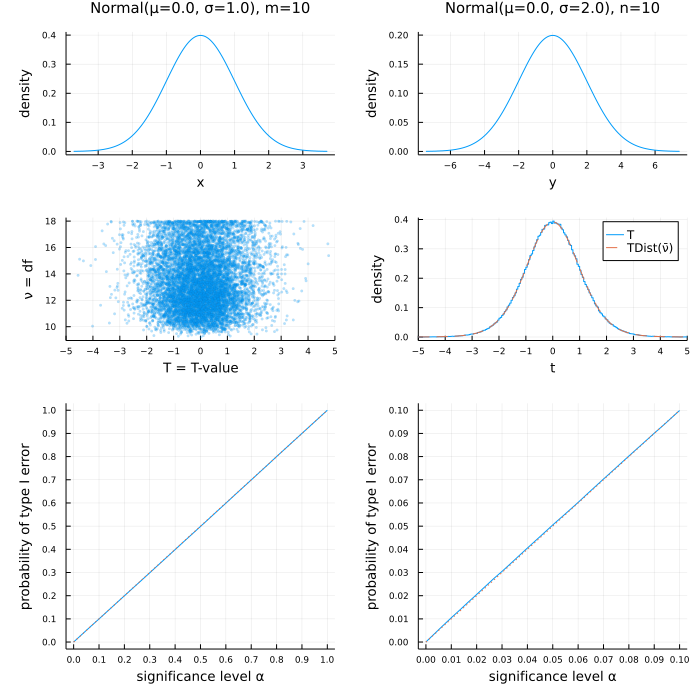

In [35]:
plot_welch(distx=Normal(0,1), m=10, disty=Normal(0,2), n=10)

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 40,  μ_y = 0.000,  σ_y = 2.000,  skewness_y = 0.000,  kurtosis_y = 0.000
Δμ = 0.0
ν̄ = mean(df) = 31.1515464432953


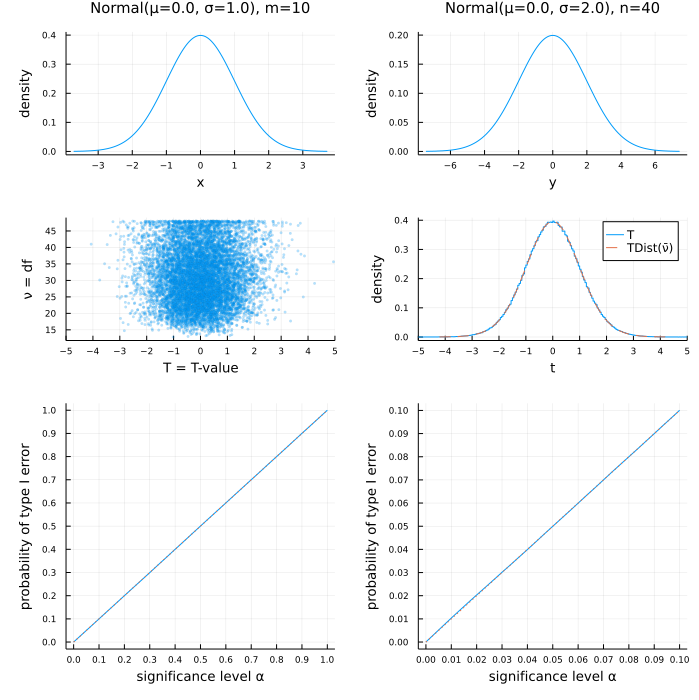

In [36]:
plot_welch(distx=Normal(0,1), m=10, disty=Normal(0,2), n=40)

m = 40,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 10,  μ_y = 0.000,  σ_y = 2.000,  skewness_y = 0.000,  kurtosis_y = 0.000
Δμ = 0.0
ν̄ = mean(df) = 10.501568177803936


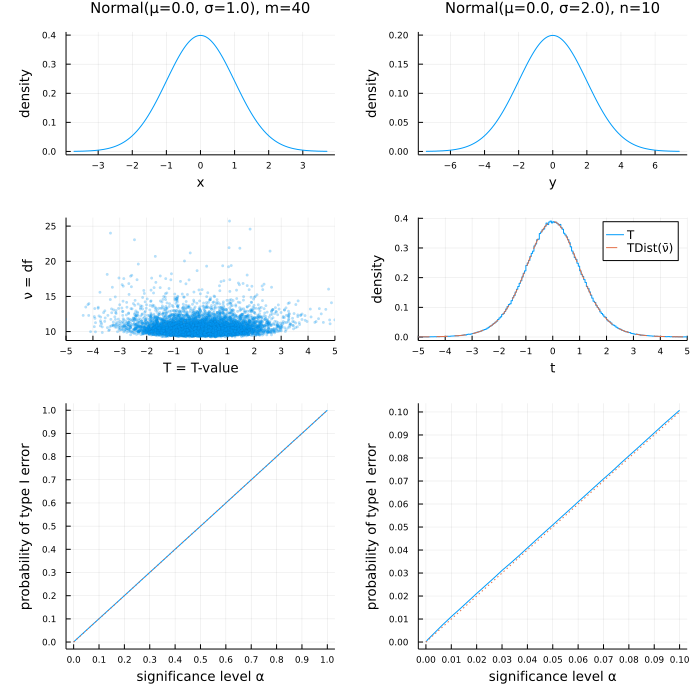

In [37]:
plot_welch(distx=Normal(0,1), m=40, disty=Normal(0,2), n=10)

### 異なる分散を持つ一様分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

2つのサンプル $x_i$ と $y_j$ のサイズ $m$, $n$ のアンバランスは誤差増大の原因になり得る.

m = 10,  μ_x = 0.000,  σ_x = 0.577,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 10,  μ_y = 0.000,  σ_y = 1.155,  skewness_y = 0.000,  kurtosis_y = -1.200
Δμ = 0.0
ν̄ = mean(df) = 13.44142252050102


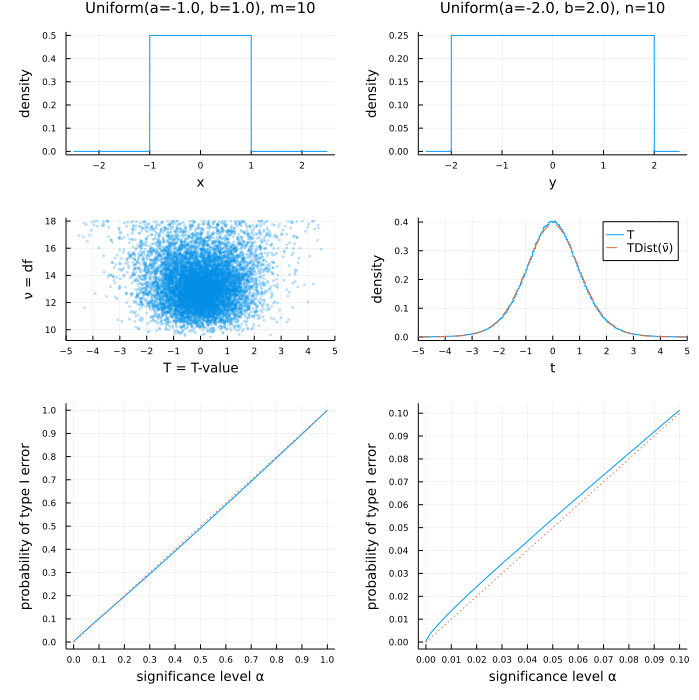

In [38]:
plot_welch(distx=Uniform(-1,1), m=10, disty=Uniform(-2,2), n=10,
    distxlim=(-2.5, 2.5), distylim=(-2.5, 2.5))

m = 10,  μ_x = 0.000,  σ_x = 0.577,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 40,  μ_y = 0.000,  σ_y = 1.155,  skewness_y = 0.000,  kurtosis_y = -1.200
Δμ = 0.0
ν̄ = mean(df) = 30.333388674084826


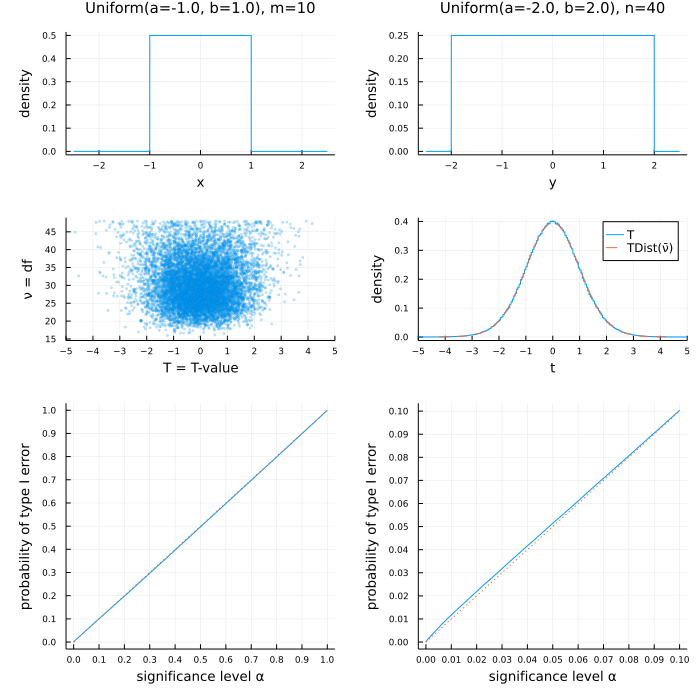

In [39]:
plot_welch(distx=Uniform(-1,1), m=10, disty=Uniform(-2,2), n=40,
    distxlim=(-2.5, 2.5), distylim=(-2.5, 2.5))

m = 40,  μ_x = 0.000,  σ_x = 0.577,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 10,  μ_y = 0.000,  σ_y = 1.155,  skewness_y = 0.000,  kurtosis_y = -1.200
Δμ = 0.0
ν̄ = mean(df) = 10.319694128395549


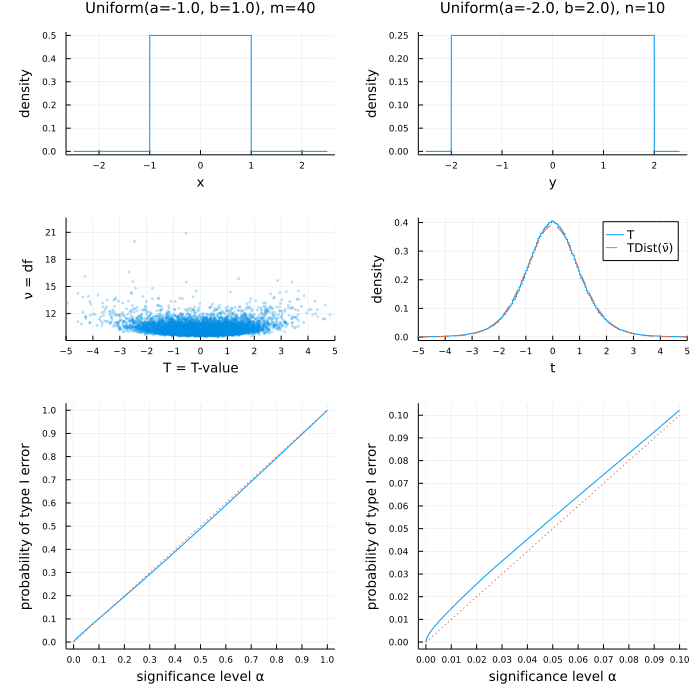

In [40]:
plot_welch(distx=Uniform(-1,1), m=40, disty=Uniform(-2,2), n=10,
    distxlim=(-2.5, 2.5), distylim=(-2.5, 2.5))

### 正規分布とガンマ分布の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

正規分布の標本と左右非対称な分布の平均を比較したい場合には, 後者の左右非対称な分布の側のサンプルサイズを大きくした方が誤差が小さくなり易そうなことを以下の計算は示唆している.

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 10,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 10.507446436415803


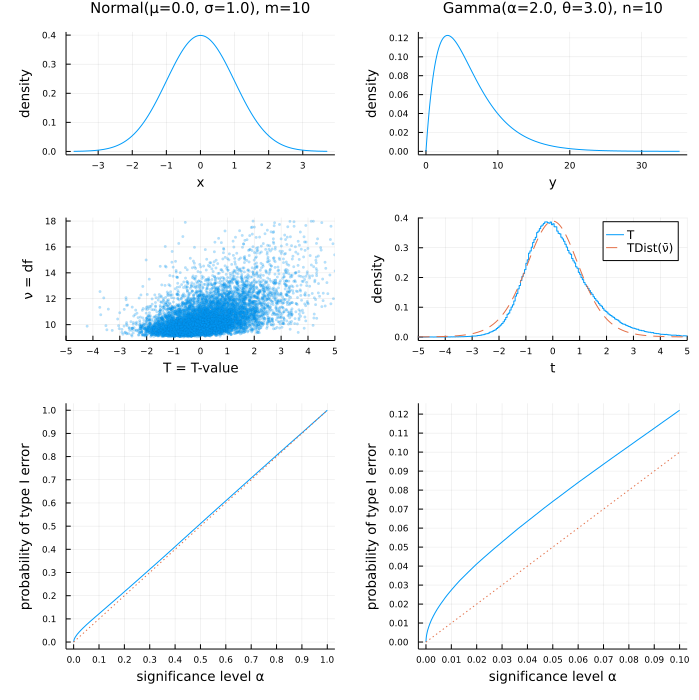

In [41]:
plot_welch(distx=Normal(0,1), m=10, disty=Gamma(2,3), n=10)

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 40,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 45.92679392427271


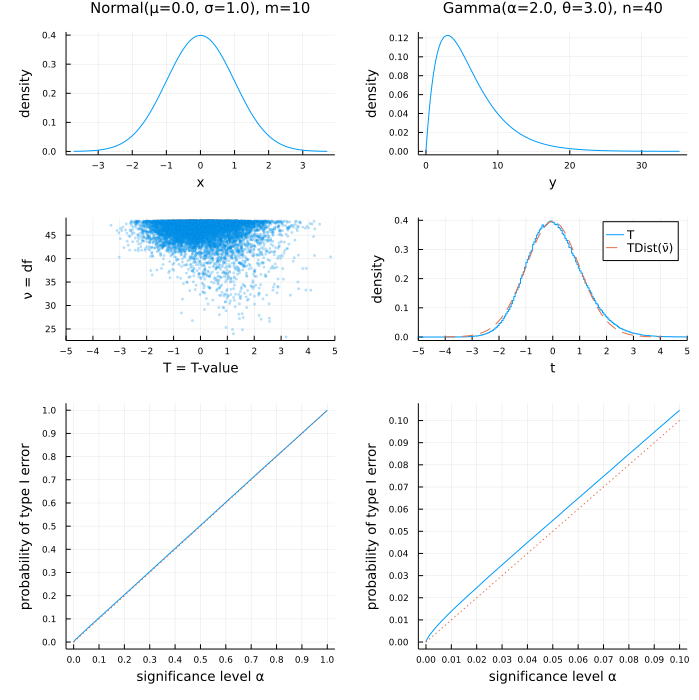

In [42]:
plot_welch(distx=Normal(0,1), m=10, disty=Gamma(2,3), n=40)

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 160,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 47.349959632075056


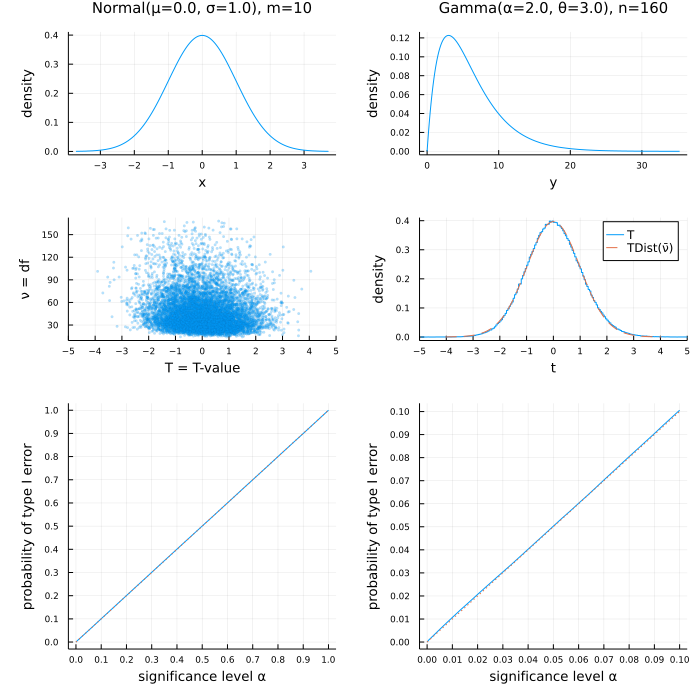

In [43]:
plot_welch(distx=Normal(0,1), m=10, disty=Gamma(2,3), n=160)

m = 40,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 10,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 9.401955759038113


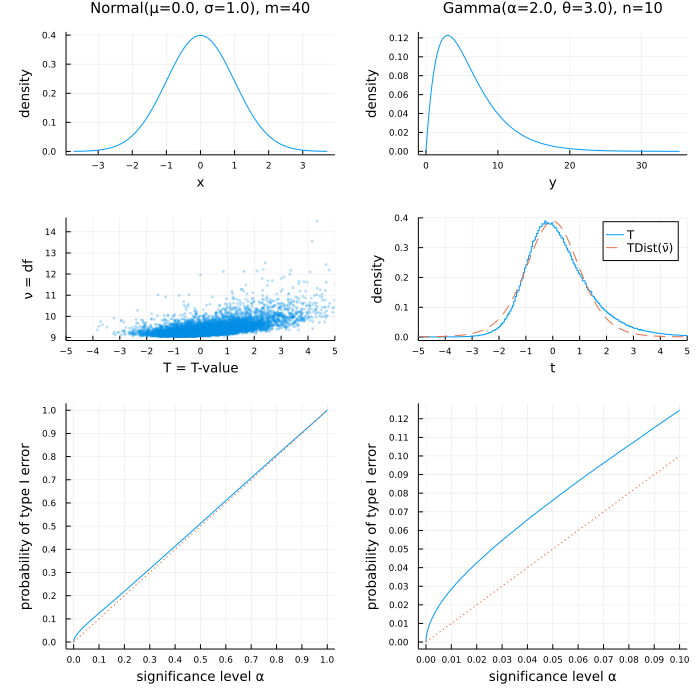

In [44]:
plot_welch(distx=Normal(0,1), m=40, disty=Gamma(2,3), n=10)

m = 160,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 10,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 9.099512063767147


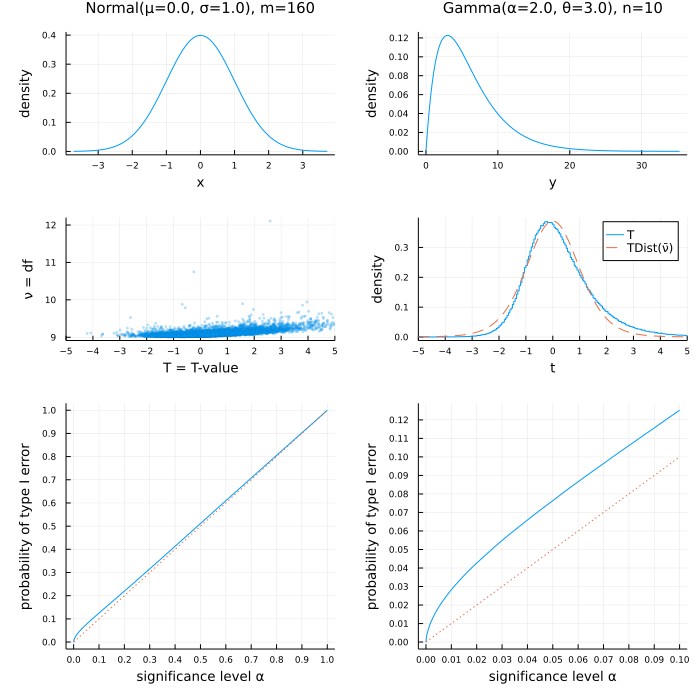

In [45]:
plot_welch(distx=Normal(0,1), m=160, disty=Gamma(2,3), n=10)

### 一様分布とガンマ分布の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

m = 10,  μ_x = 0.000,  σ_x = 1.155,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 10,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 10.982748150653544


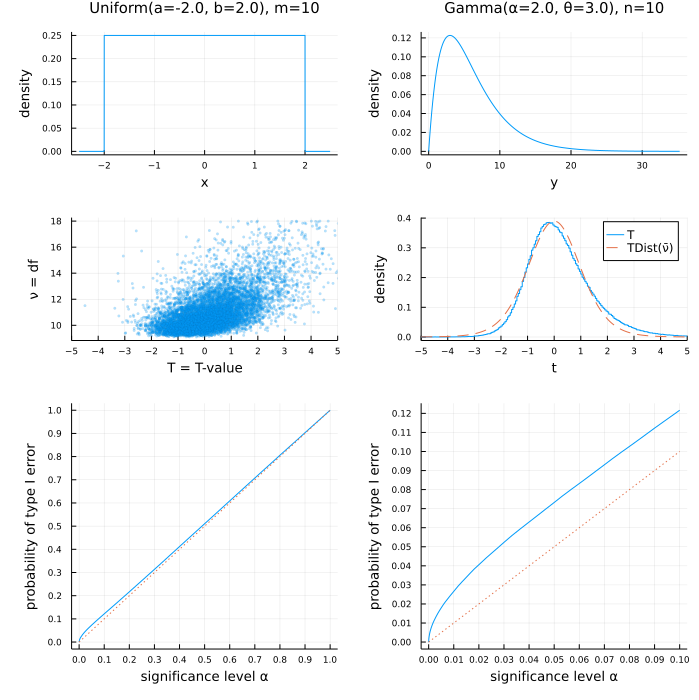

In [46]:
plot_welch(distx=Uniform(-2,2), m=10, disty=Gamma(2,3), n=10,
    distxlim=(-2.5, 2.5))

m = 10,  μ_x = 0.000,  σ_x = 1.155,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 40,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 45.401533049798104


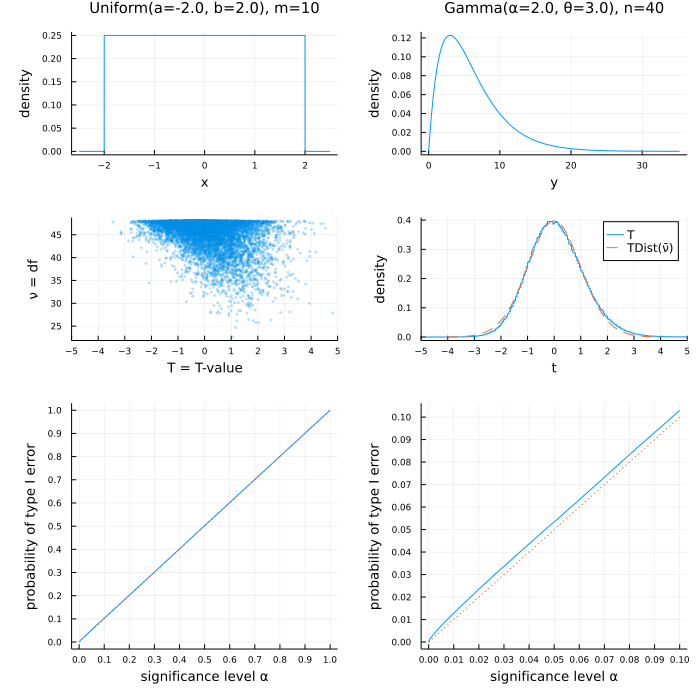

In [47]:
plot_welch(distx=Uniform(-2,2), m=10, disty=Gamma(2,3), n=40,
    distxlim=(-2.5, 2.5))

m = 40,  μ_x = 0.000,  σ_x = 1.155,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 10,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 9.537927066646965


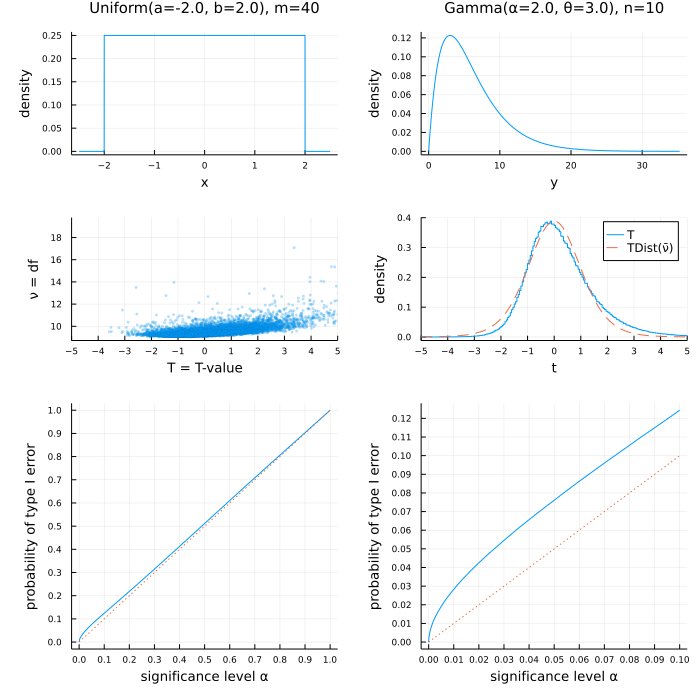

In [48]:
plot_welch(distx=Uniform(-2,2), m=40, disty=Gamma(2,3), n=10,
    distxlim=(-2.5, 2.5))

m = 40,  μ_x = 0.000,  σ_x = 1.155,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 40,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 45.437985835525495


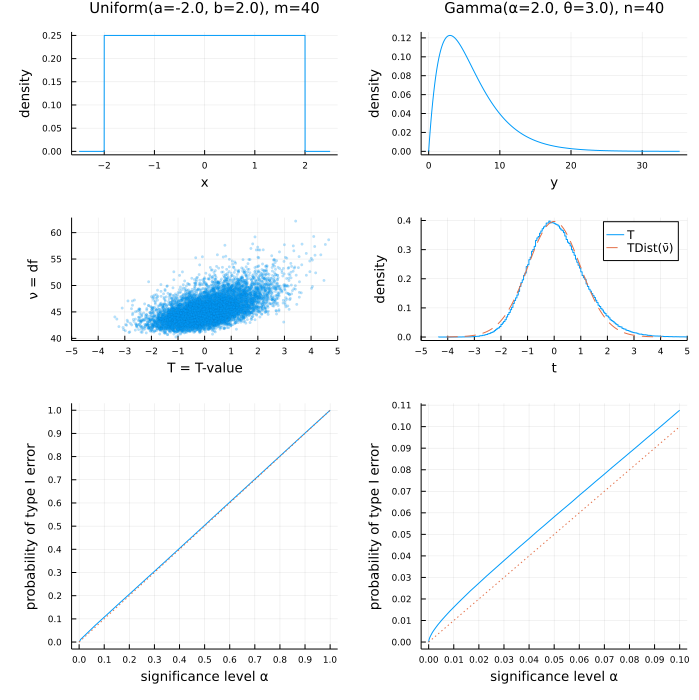

In [49]:
plot_welch(distx=Uniform(-2,2), m=40, disty=Gamma(2,3), n=40,
    distxlim=(-2.5, 2.5))

m = 40,  μ_x = 0.000,  σ_x = 1.155,  skewness_x = 0.000,  kurtosis_x = -1.200
n = 160,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = -6.0
ν̄ = mean(df) = 194.60051887802356


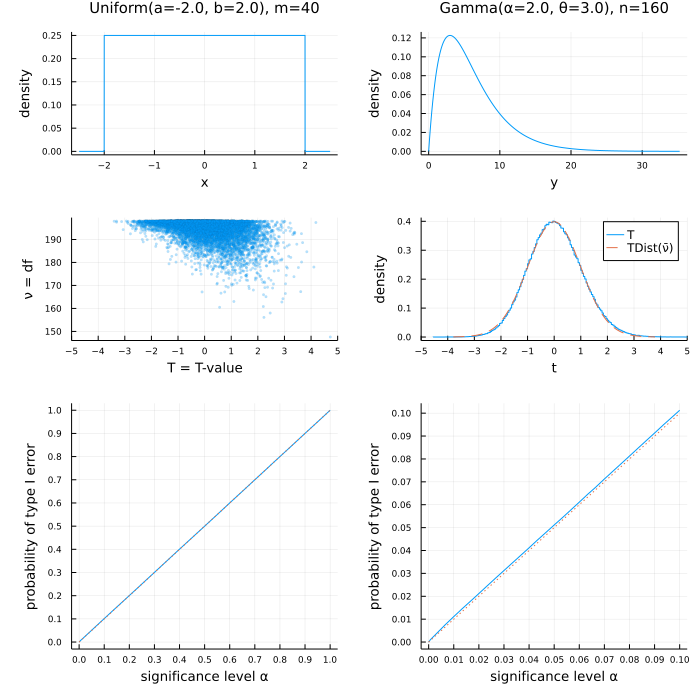

In [50]:
plot_welch(distx=Uniform(-2,2), m=40, disty=Gamma(2,3), n=160,
    distxlim=(-2.5, 2.5))

### 同一のガンマ分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

$X_i$ 達と $Y_j$ 達が同一の左右非対称な分布のサンプルであるとき, 2つのサンプルサイズを同じにした方が誤差が小さくなりそうなことを以下の計算結果は示唆している.

m = 10,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 10,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 15.799269001324523


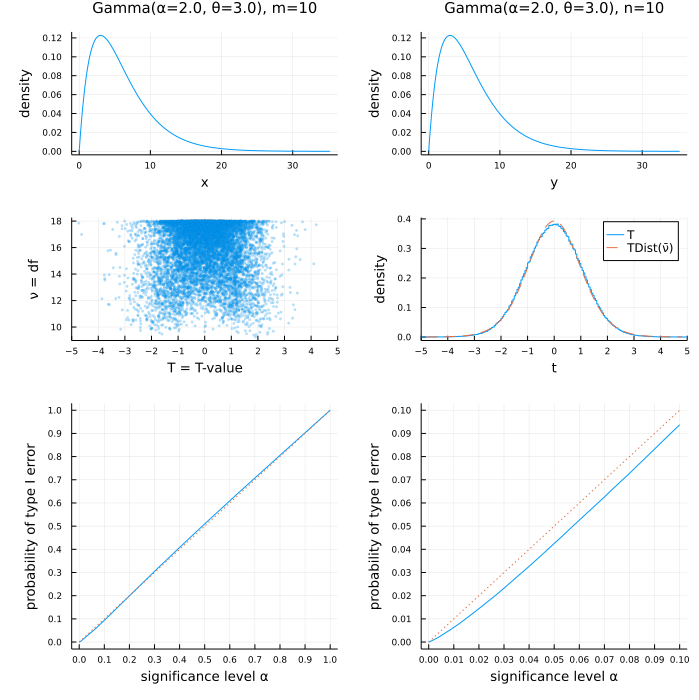

In [51]:
plot_welch(distx=Gamma(2,3), m=10, disty=Gamma(2,3), n=10)

m = 10,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 40,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 16.687696645629813


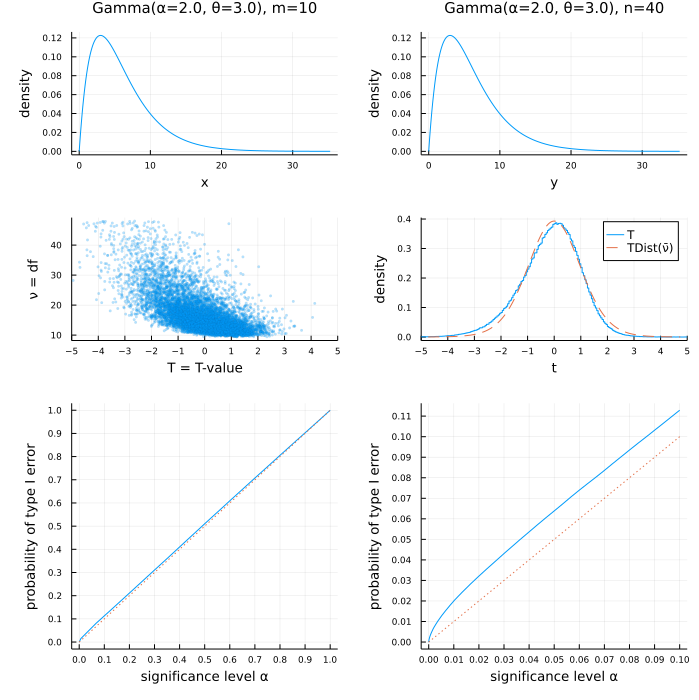

In [52]:
plot_welch(distx=Gamma(2,3), m=10, disty=Gamma(2,3), n=40)

m = 10,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 160,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 10.921556361918844


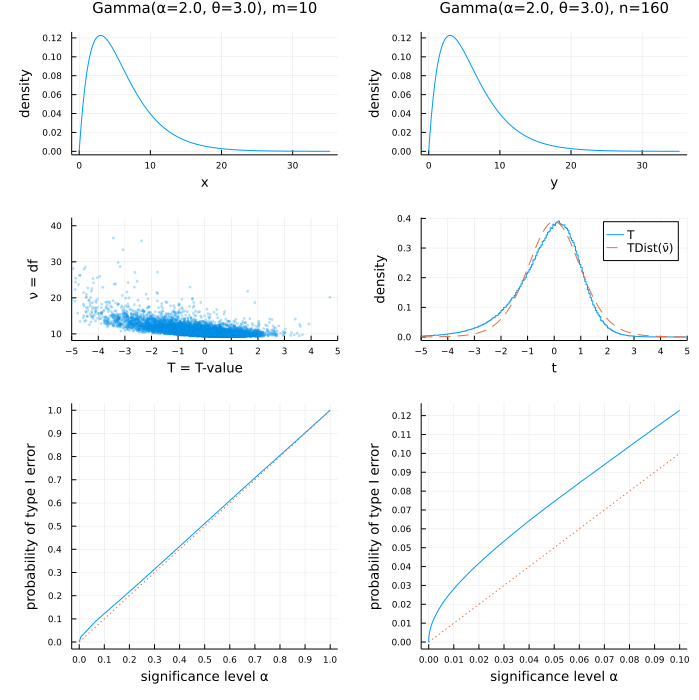

In [53]:
plot_welch(distx=Gamma(2,3), m=10, disty=Gamma(2,3), n=160)

m = 40,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 160,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 62.91931721573467


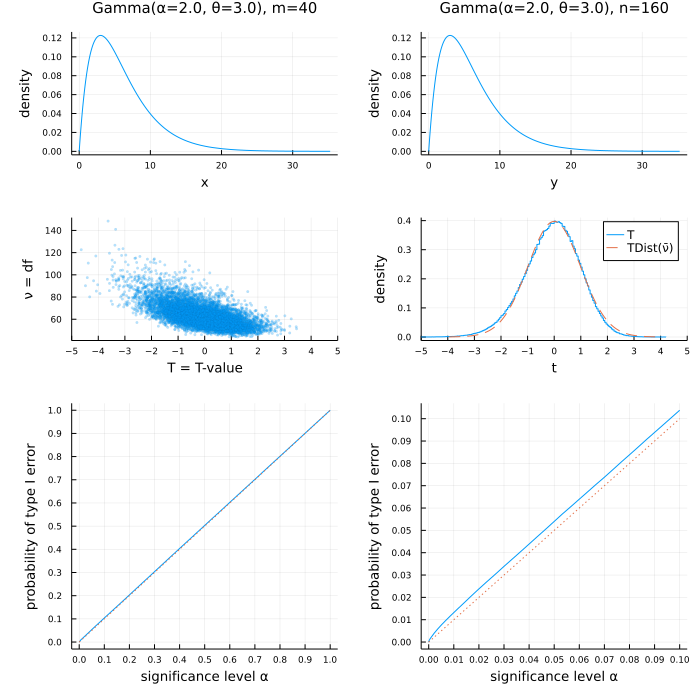

In [54]:
plot_welch(distx=Gamma(2,3), m=40, disty=Gamma(2,3), n=160)

m = 160,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 160,  μ_y = 6.000,  σ_y = 4.243,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 313.4552897349271


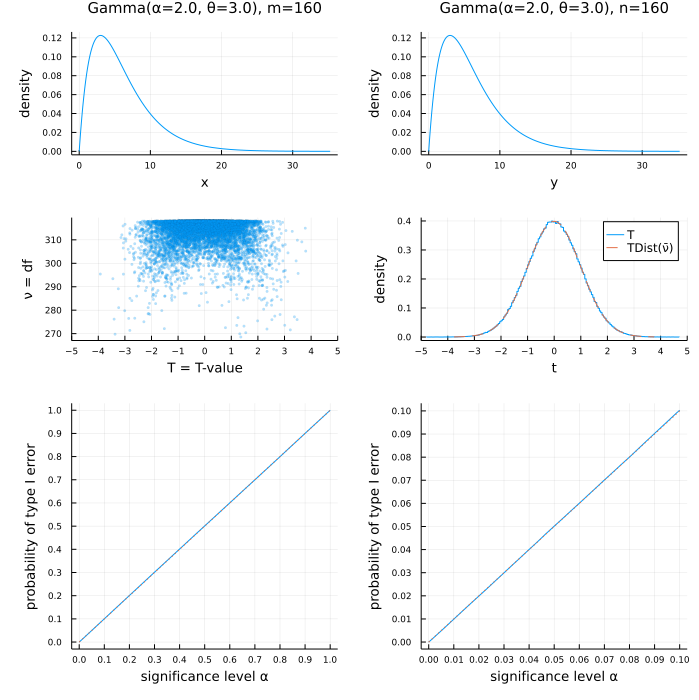

In [55]:
plot_welch(distx=Gamma(2,3), m=160, disty=Gamma(2,3), n=160)

### 異なるガンマ分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

m = 10,  μ_x = 12.000,  σ_x = 4.899,  skewness_x = 0.816,  kurtosis_x = 1.000
n = 10,  μ_y = 12.000,  σ_y = 8.485,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 14.517640411168712


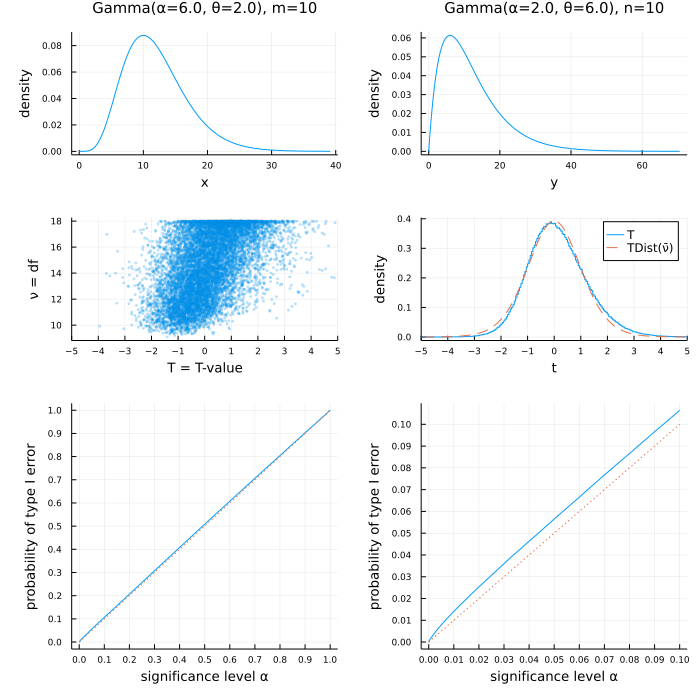

In [56]:
plot_welch(distx=Gamma(6,2), m=10, disty=Gamma(2,6), n=10)

m = 10,  μ_x = 12.000,  σ_x = 4.899,  skewness_x = 0.816,  kurtosis_x = 1.000
n = 40,  μ_y = 12.000,  σ_y = 8.485,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 27.18576226375518


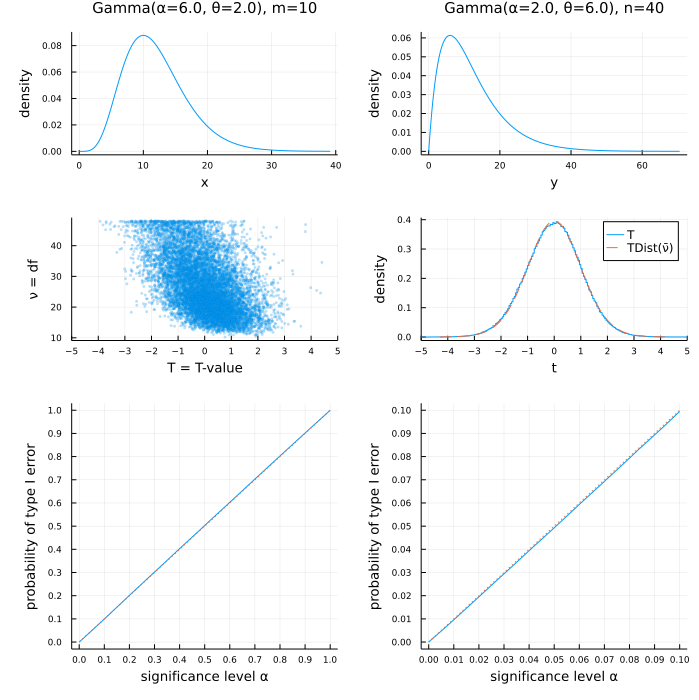

In [57]:
plot_welch(distx=Gamma(6,2), m=10, disty=Gamma(2,6), n=40)

m = 40,  μ_x = 12.000,  σ_x = 4.899,  skewness_x = 0.816,  kurtosis_x = 1.000
n = 10,  μ_y = 12.000,  σ_y = 8.485,  skewness_y = 1.414,  kurtosis_y = 3.000
Δμ = 0.0
ν̄ = mean(df) = 11.532330677616473


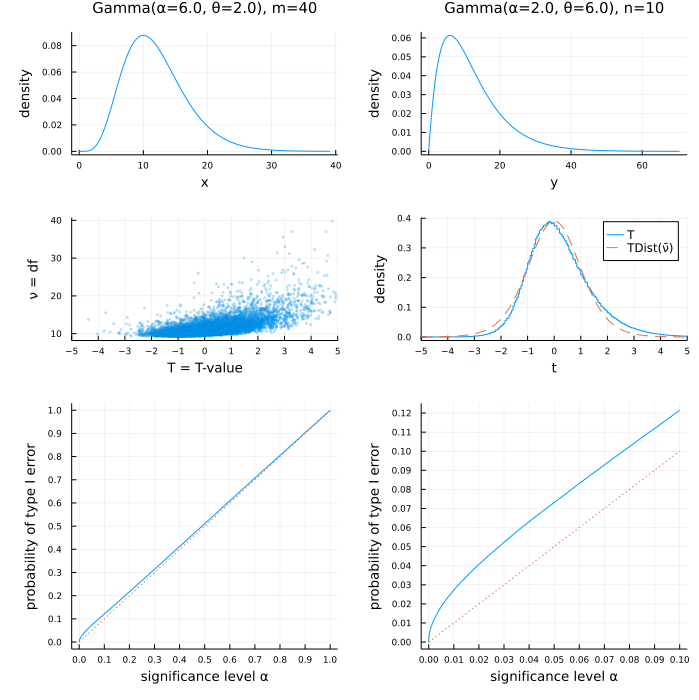

In [58]:
plot_welch(distx=Gamma(6,2), m=40, disty=Gamma(2,6), n=10)

### 正規分布と対数正規分布の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 10,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -1.6487212707001282
ν̄ = mean(df) = 14.485474368552183


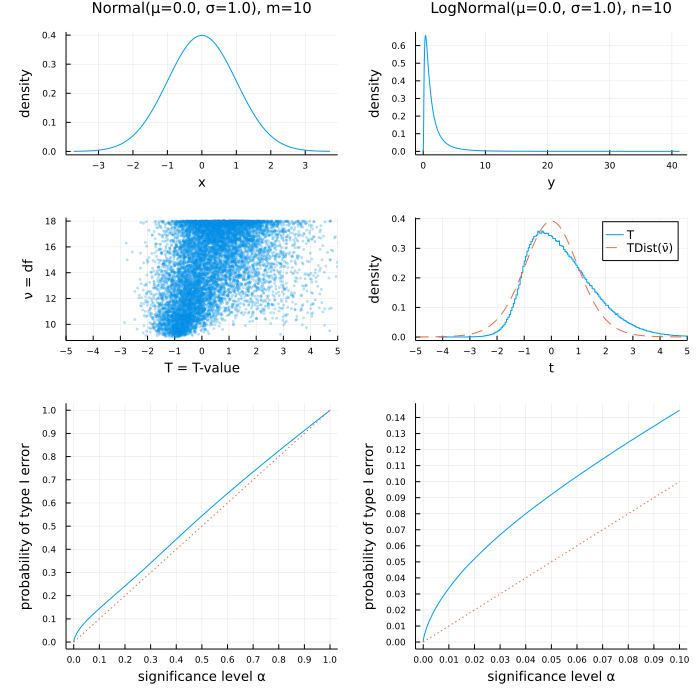

In [59]:
plot_welch(distx=Normal(0,1), m=10, disty=LogNormal(), n=10)

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 40,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -1.6487212707001282
ν̄ = mean(df) = 28.555399482642507


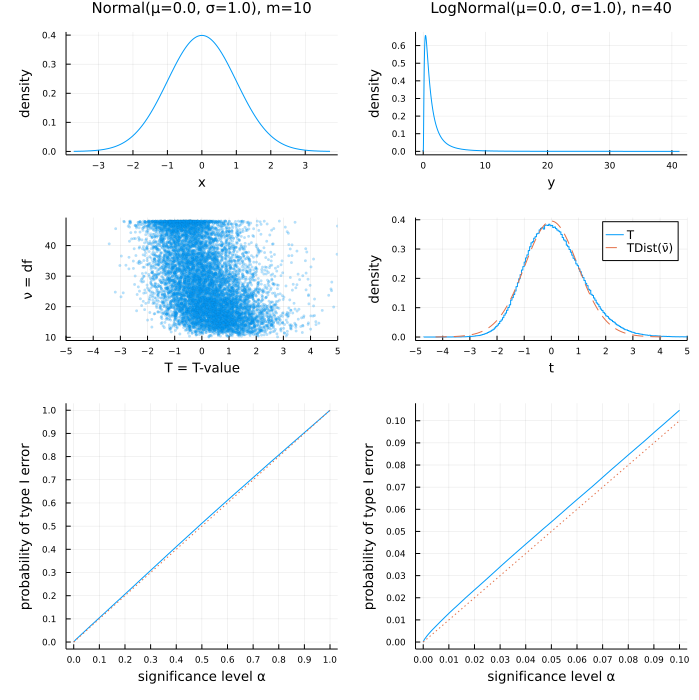

In [60]:
plot_welch(distx=Normal(0,1), m=10, disty=LogNormal(), n=40)

m = 10,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 160,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -1.6487212707001282
ν̄ = mean(df) = 17.402741365856087


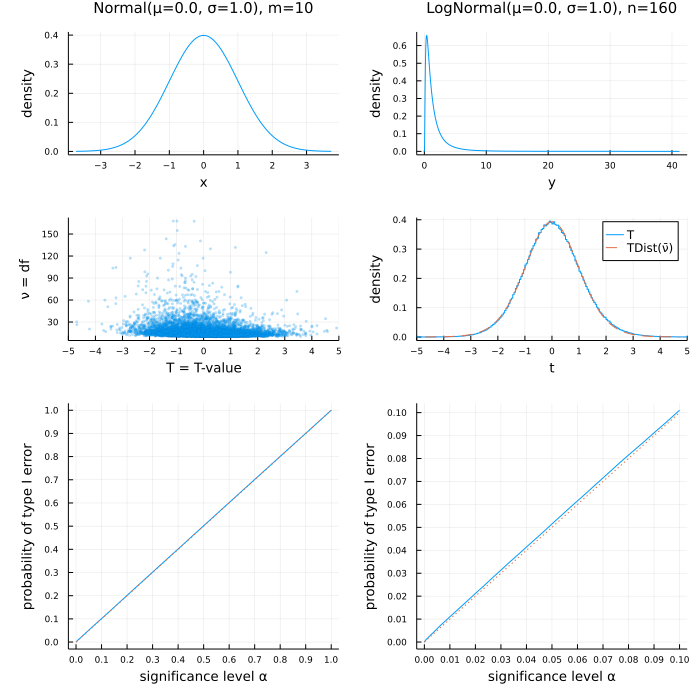

In [61]:
plot_welch(distx=Normal(0,1), m=10, disty=LogNormal(), n=160)

### 同一の対数正規分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

m = 10,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 10,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = 0.0
ν̄ = mean(df) = 14.114896151322853


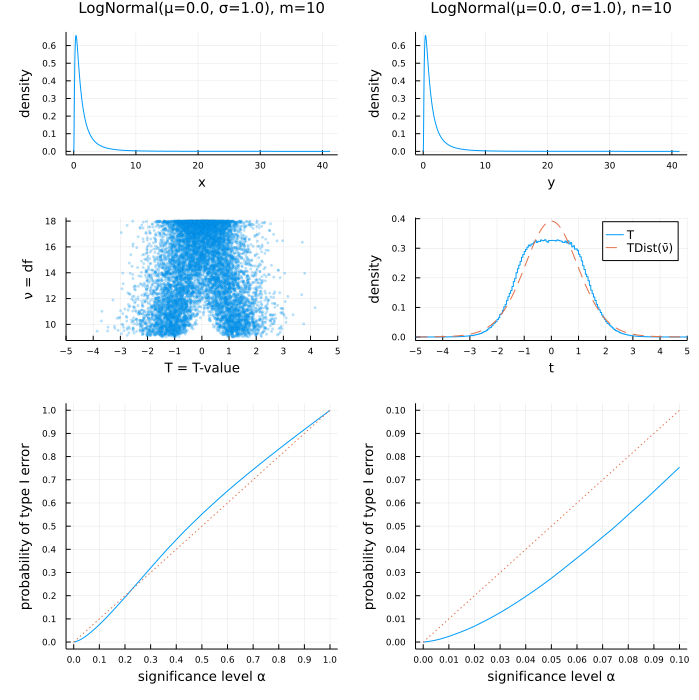

In [62]:
plot_welch(distx=LogNormal(), m=10, disty=LogNormal(), n=10)

m = 10,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 40,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = 0.0
ν̄ = mean(df) = 22.14784395106809


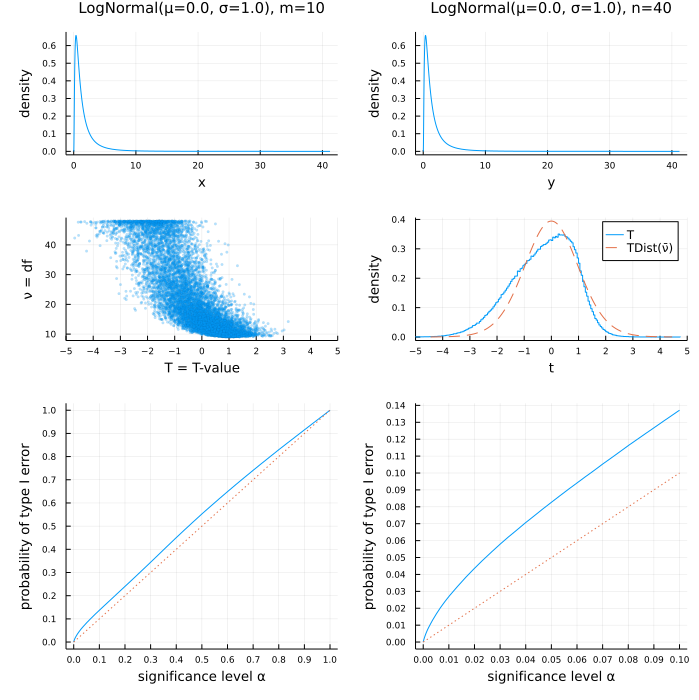

In [63]:
plot_welch(distx=LogNormal(), m=10, disty=LogNormal(), n=40)

m = 40,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 40,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = 0.0
ν̄ = mean(df) = 67.11277328855677


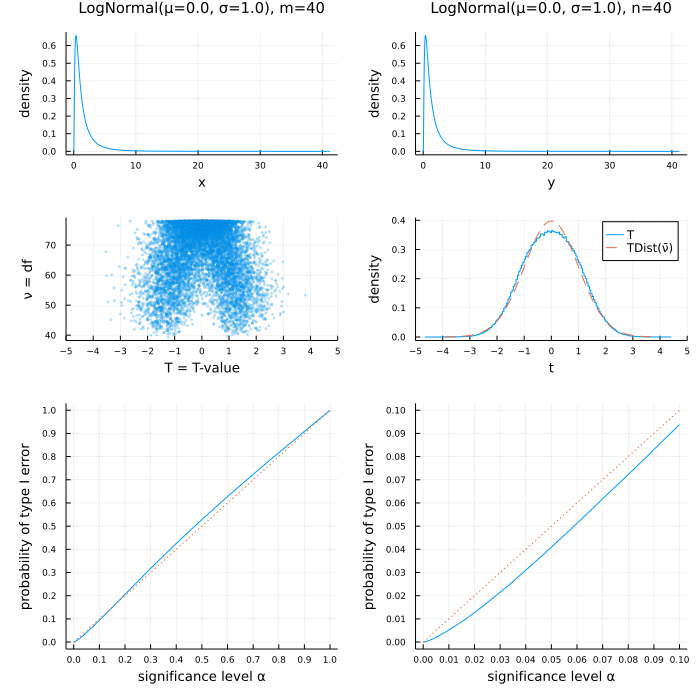

In [64]:
plot_welch(distx=LogNormal(), m=40, disty=LogNormal(), n=40)

m = 40,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 160,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = 0.0
ν̄ = mean(df) = 76.55500798158911


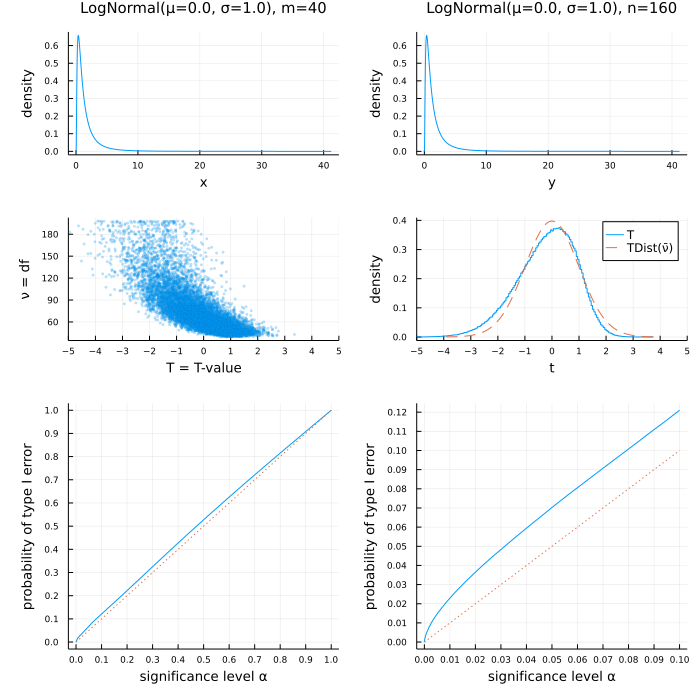

In [65]:
plot_welch(distx=LogNormal(), m=40, disty=LogNormal(), n=160)

m = 160,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 160,  μ_y = 1.649,  σ_y = 2.161,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = 0.0
ν̄ = mean(df) = 293.3332485524279


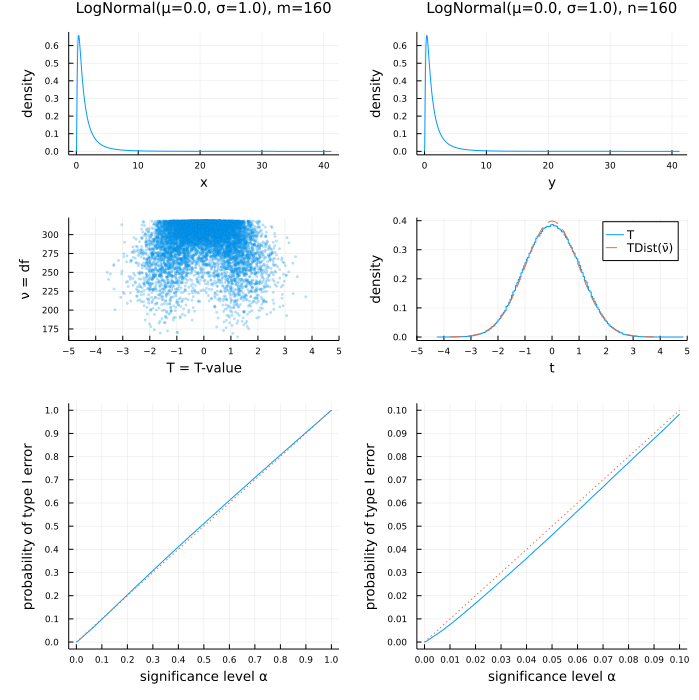

In [66]:
plot_welch(distx=LogNormal(), m=160, disty=LogNormal(), n=160)

### 異なる対数正規分布達の標本でのWelchの t 検定での第一種の過誤の確率の視覚化

以下はWelchの $t$ 検定およびそれに付随する信頼区間の使用が危険になる場合があることがわかる計算例になっている.

m = 10,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 10,  μ_y = 4.482,  σ_y = 5.875,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -2.8329677996379363
ν̄ = mean(df) = 12.305907287778117


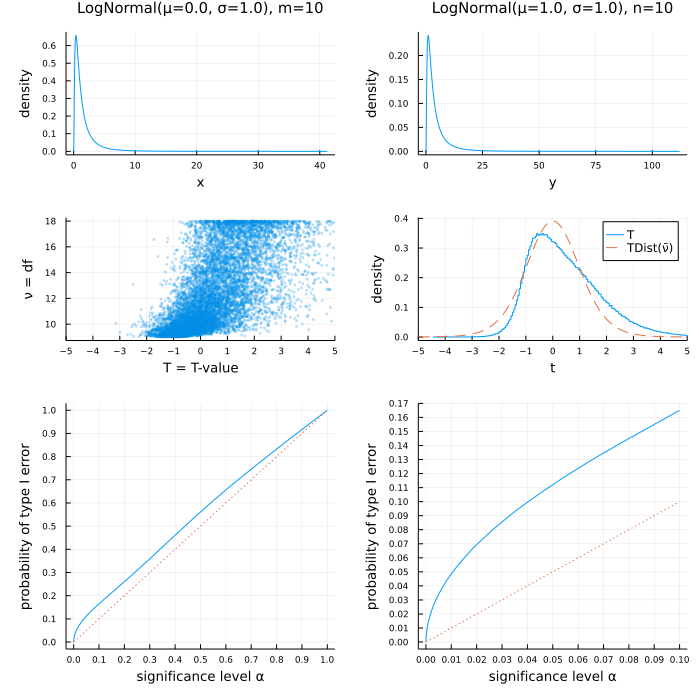

In [67]:
plot_welch(distx=LogNormal(), m=10, disty=LogNormal(1), n=10)

m = 10,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 40,  μ_y = 4.482,  σ_y = 5.875,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -2.8329677996379363
ν̄ = mean(df) = 38.24579164803262


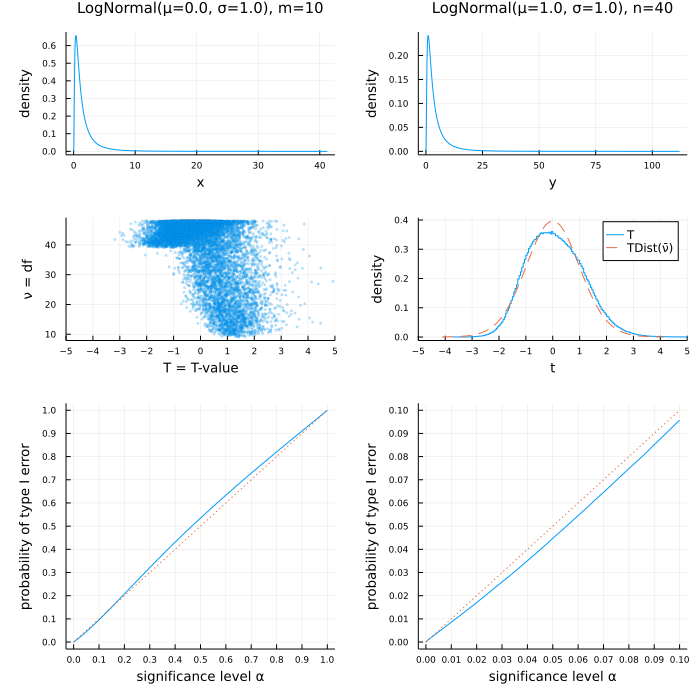

In [68]:
plot_welch(distx=LogNormal(), m=10, disty=LogNormal(1), n=40)

m = 40,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 40,  μ_y = 4.482,  σ_y = 5.875,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -2.8329677996379363
ν̄ = mean(df) = 52.60583836725731


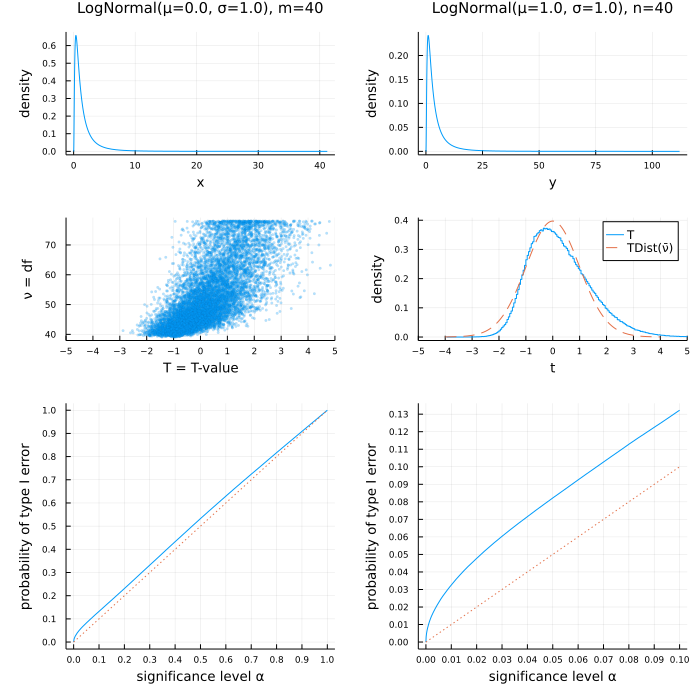

In [69]:
plot_welch(distx=LogNormal(), m=40, disty=LogNormal(1), n=40)

m = 40,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 160,  μ_y = 4.482,  σ_y = 5.875,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -2.8329677996379363
ν̄ = mean(df) = 165.3019258372765


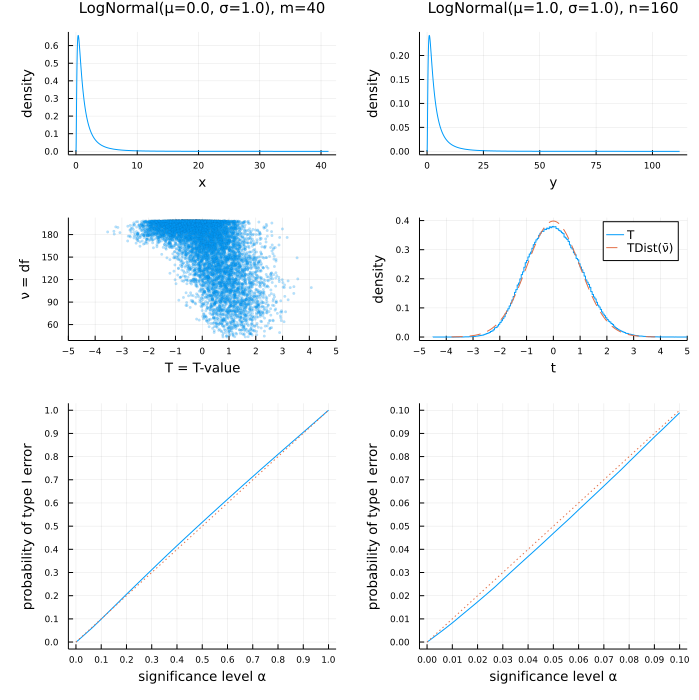

In [70]:
plot_welch(distx=LogNormal(), m=40, disty=LogNormal(1), n=160)

m = 160,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 160,  μ_y = 4.482,  σ_y = 5.875,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -2.8329677996379363
ν̄ = mean(df) = 208.6607725137111


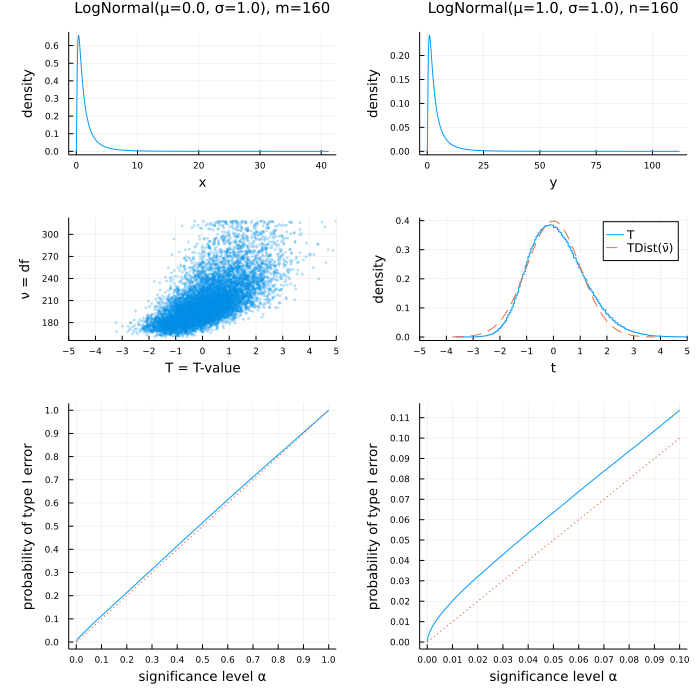

In [71]:
plot_welch(distx=LogNormal(), m=160, disty=LogNormal(1), n=160)

m = 160,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 640,  μ_y = 4.482,  σ_y = 5.875,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -2.8329677996379363
ν̄ = mean(df) = 684.2386220164234


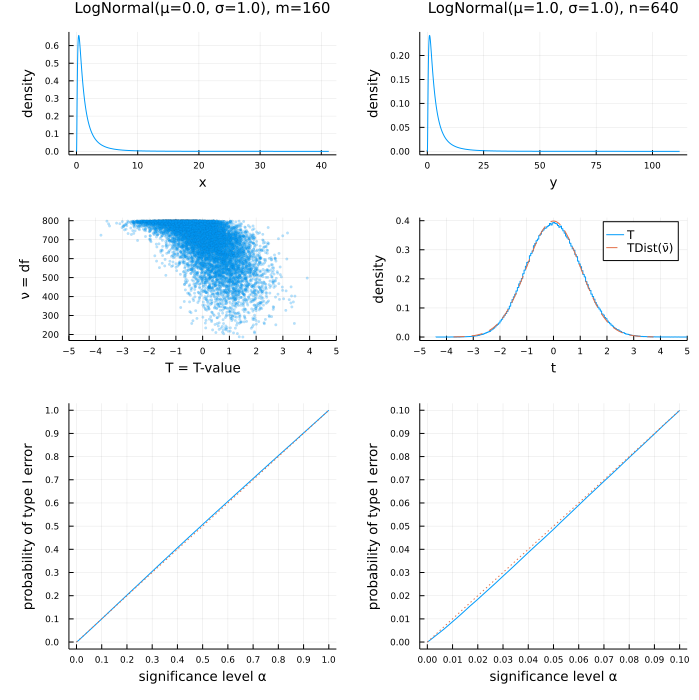

In [72]:
plot_welch(distx=LogNormal(), m=160, disty=LogNormal(1), n=640)

m = 640,  μ_x = 1.649,  σ_x = 2.161,  skewness_x = 6.185,  kurtosis_x = 110.936
n = 640,  μ_y = 4.482,  σ_y = 5.875,  skewness_y = 6.185,  kurtosis_y = 110.936
Δμ = -2.8329677996379363
ν̄ = mean(df) = 821.3712069009249


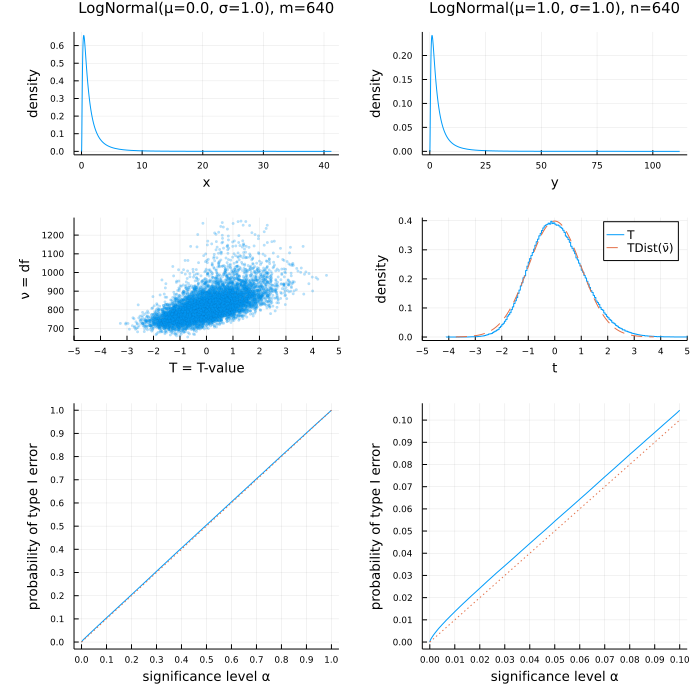

In [73]:
plot_welch(distx=LogNormal(), m=640, disty=LogNormal(1), n=640)

## 補足: Studentの t 検定について

このノートでは2群の平均の比較に関するStudentの t 検定は扱わずに, Welchの t 検定のP値と信頼区間で押し通すことにした.  しかし, 読者の便のためにStudentの t 検定のP値と信頼区間についても補足しておくことにする.

### Studentの t 検定のP値と信頼区間の定義

扱うデータの形式はWelchの t 検定の場合と同じである.

__データ:__　$m$ 個の実数値 $x_1,\ldots,x_m$ と $n$ 個の実数値 $y_1,\ldots,y_n$.

$x_i$ 達と $y_i$ 達の標本平均と不偏分散を以下のように書くことにする:

$$
\begin{alignedat}{2}
&
\xbar = \frac{1}{m}\sum_{i=1}^m x_i, \quad
& &
s_x^2 = \frac{1}{m-1}\sum_{i=1}^m (x_i - \xbar)^2,
\\ &
\ybar = \frac{1}{n}\sum_{i=1}^n y_i, \quad
& &
s_y^2 = \frac{1}{n-1}\sum_{i=1}^m (y_i - \ybar)^2.
\end{alignedat}
$$

Studentの t 検定ではWelchの t 検定の場合と違って __等分散の条件を仮定__ をする.

__統計モデル:__ 平均 $\mu_x$ と分散 $\sigma_x^2$ を持つ確率分布 $D_x$ のサイズ $m$ の標本分布 $D_x^m$ と平均 $\mu_y$ と分散 $\sigma_y^2$ を持つ確率分布 $D_y$ のサイズ $n$ の標本分布 $D_y^n$ の直積分布 $D_x^m\times D_y^n$ を統計モデルとして採用する. ただし, __等分散の条件 $\sigma_x^2 = \sigma_y^2 = \sigma^2$ を仮定する.__

このモデルの確率分布に従う確率変数達(独立になる)を $X_1,\ldots,X_m,Y_1,\ldots,Y_n$ と書き, $X_i$ 達と $Y_i$ 達の標本平均と不偏分散を以下のように書くことにする:

$$
\begin{alignedat}{2}
&
\Xbar = \frac{1}{m}\sum_{i=1}^m X_i, \quad
& &
S_x^2 = \frac{1}{m-1}\sum_{i=1}^m (X_i - \Xbar)^2,
\\ &
\Ybar = \frac{1}{n}\sum_{i=1}^n Y_i, \quad
& &
S_y^2 = \frac{1}{n-1}\sum_{i=1}^m (Y_i - \Ybar)^2.
\end{alignedat}
$$

__この統計モデルが適用可能な場合:__ 分散が等しい(もしくはほぼ等しい)2つの母集団からの無作為抽出で $x_i$, $y_j$ のそれぞれが得られている場合には上のモデルの適用は適切になる.

__検定したい仮説:__　$\mu_x - \mu_y = \dmu$　($\dmu$ は具体的な数値).

__中心極限定理:__ モデル内確率変数としての2つの標本平均達の分布について, 中心極限定理による正規分布近似が使えると仮定する. (等分散の条件 $\sigma_x^2=\sigma_y^2=\sigma^2$ が仮定されていることに注意せよ.)

$\Xbar$, $\Ybar$ の平均(期待値)と分散は以下のようになる:

$$
E[\Xbar] = \mu_x, \quad
E[\Ybar] = \mu_y, \quad
\var(\Xbar) = \frac{\sigma^2}{m}, \quad
\var(\Ybar) = \frac{\sigma^2}{n}.
$$

さらに, $\Xbar$ と $\Ybar$ が確率変数として独立であることより,

$$
E[\Xbar - \Ybar] = \mu_x - \mu_y, \quad
\var(\Xbar - \Ybar) = \sigma^2\left(\frac{1}{m} + \frac{1}{n}\right).
$$

さらに, 中心極限定理より, 次の近似が使える:

$$
\Xbar - \Ybar \sim
\Normal\left(\mu_x - \mu_y,\; \sqrt{\sigma^2\left(\frac{1}{m} + \frac{1}{n}\right)}\right),
\quad\text{approximately}.
$$

すなわち,

$$
\frac
{(\Xbar - \Ybar) - (\mu_x - \mu_y)}
{\ds \sqrt{\sigma^2\left(\frac{1}{m} + \frac{1}{n}\right)}} \sim \Normal(0,1),
\quad\text{approximately}.
$$

__大数の法則:__ 確率変数 $S^2$ を次のように定義する:

$$
S^2 = \frac{(m-1)S_x^2 + (n-1)S_y^2}{m+n-2}.
$$

このとき,

$$
E[S^2] =
\frac{(m-1)E[S_x^2]+(n-1)E[S_y^2]}{m+n-2} =
\frac{(m-1)\sigma^2+(n-1)\sigma^2}{m+n-2} = \sigma^2
$$

より, $S^2$ は $\sigma^2$ の不偏推定量である.  そして, さらに大数の法則によって, $m,n$ が十分に大きいならば, $S^2$ は $\sigma^2$ をよく近似するようになる.

このとき, 次の近似が使える:

$$
T :=
\frac
{(\Xbar - \Ybar) - (\mu_x - \mu_y)}
{\ds \sqrt{S^2\left(\frac{1}{m} + \frac{1}{n}\right)}} \sim \Normal(0,1),
\quad\text{approximately}.
$$

この $T$ の定義はWelchの t 検定で使った $T$ の定義とは分母の形が本質的に異なる.

__P値の定義:__ これを用いて, 具体的に与えられた数値 $\dmu$ に関する仮説「$\mu_x - \mu_y = \dmu$」のP値を以下のように定義する.  まず, 

$$
s^2 = \frac{(m-1)s_x^2 + (n-1)s_y^2}{m+n-2}
$$

とおき, データの数値の $t$ 値 $t=t(\dmu)$ を次のように定義する: 

$$
t = t(\dmu) =
\frac
{(\xbar - \ybar) - \dmu}
{\ds \sqrt{s^2\left(\frac{1}{m} + \frac{1}{n}\right)}}.
$$

この $t=t(\dmu)$ の定義はWelchの t 検定で使った $t=t(\dmu)$ の定義とは分母の形が本質的に異なる.

仮説「$\mu_x - \mu_y = \dmu$」のP値を, その仮説下のモデル内の確率変数としての $t$ 値 $T$ の値の絶対値がデータから計算した $t$ 値 $t=t(\dmu)$ の絶対値以上になる確率の近似値として定義する:

$$
\pvalue_{\Normal}(\xbar, \ybar, s_x^2, s_y^2|m,n, \mu_x-\mu_y=\dmu) =
2(1-\cdf(\Normal(0,1), |t(\dmu)|)).
$$

しかし, 実際に使用されるのは以下のようにして $t$ 分布を使って補正されたP値の方である.

__モデルの分布として正規分布を採用:__ モデルの分布 $D_x$, $D_y$ は正規分布であると仮定する.

__正規分布の標本分布で成立していること:__ そのとき, 上のように定義された $\Xbar, \Ybar, S_x^2, S_y^2$ は独立になり, 以下を近似無しで満たしている:

$$
\begin{alignedat}{2}
&
\Xbar \sim \Normal\left(\mu_x, \sqrt{\frac{\sigma^2}{m}}\right), \quad
& &
\Ybar \sim \Normal\left(\mu_y, \sqrt{\frac{\sigma^2}{n}}\right),
\\ &
\frac{(m-1)S_x^2}{\sigma^2} \sim \Chisq(m-1), \quad
& &
\frac{(n-1)S_y^2}{\sigma^2} \sim \Chisq(n-1).
\end{alignedat}
$$

前者の2つより

$$
Z :=
\frac{(\Xbar-\Ybar)-(\mu_x-\mu_y)}
{\ds \sqrt{\sigma^2\left(\frac{1}{m} + \frac{1}{n}\right)}} \sim \Normal(0,1)
$$

が導かれ, 一般に $A,B$ がそれぞれ $\Chisq(a)$, $\Chisq(b)$ に従う独立な確率変数達であるとき $A+B$ が $\Chisq(a+b)$ に従うことを使うと,

$$
W := \frac{(m+n-2)S^2}{\sigma^2} =
\frac{(m-1)S_x^2 + (n-1)S_y^2}{\sigma^2} \sim \Chisq(m+n-2)
$$

が得られる.  このことから, 上で定義した $T$ について

$$
T = \frac{Z}{\sqrt{W/(m+n-2)}} \sim \TDist(m+n-2)
$$

が成立していることが導かれる.

__t分布を使って補正されたP値の定義:__ Studentの t 検定のP値を定義しよう:

$$
\pvalue_{\Student}(\xbar, \ybar, s_x^2, s_y^2|m,n, \mu_x-\mu_y=\dmu) =
2(1-\cdf(\TDist(m+n-2), |t(\dmu)|)).
$$

右辺の形がWelchの t 検定と似ているが, $t(\dmu)$ の定義式の分母がWelchの t 検定の場合と本質的に異なり, $t$ 分布の自由度が $m+n-2$ と定数になる点が違っている.

この補正は, $m+n-2$ が大きなとき, $\TDist(m+n-2)$ はほぼ標準正規分布になるので, 些細な補正に留まる.

__信頼区間:__ Welchの $t$ 検定のP値から定まる信頼区間は以下のように書ける.

まず, 自由度 $\nu$ の $t$ 分布において $t_{\nu,\alpha/2}$ 以上になる確率は $\alpha/2$ になると仮定する:

$$
t_{\nu,\alpha/2} = \quantile(\TDist(\nu), 1 - \alpha/2).
$$

このとき, 平均の差 $\mu_x-\mu_y$ の信頼度 $1-\alpha$ の信頼区間が次のように定義される:

$$
\begin{aligned}
&
\confint_{\Student}(\xbar, \ybar, s_x^2, s_y^2|m,n,\alpha)
\\ &=
\left[
\xbar - \ybar - t_{m+n-2,\alpha/2}\sqrt{s^2\left(\frac{1}{m} + \frac{1}{n}\right)},\;
\xbar - \ybar + t_{m+n-2,\alpha/2}\sqrt{s^2\left(\frac{1}{m} + \frac{1}{n}\right)}\;
\right].
\end{aligned}
$$

ここで,

$$
s^2 = \frac{(m-1)s_x^2 + (n-1)s_y^2}{m+n-2}.
$$

### Studentの t 検定とWelchの t 検定に付随する信頼区間の比較

2つの信頼区間の定義を並べて書いてみよう:

$$
\begin{aligned}
&
\confint_{\Welch}(\xbar, \ybar, s_x^2, s_y^2|m,n,\alpha)
\\ &=
\left[
\xbar - \ybar - t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}},\;
\xbar - \ybar + t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}}\;
\right],
\\ &
\confint_{\Student}(\xbar, \ybar, s_x^2, s_y^2|m,n,\alpha)
\\ &=
\left[
\xbar - \ybar - t_{m+n-2,\alpha/2}\sqrt{s^2\left(\frac{1}{m} + \frac{1}{n}\right)},\;
\xbar - \ybar + t_{m+n-2,\alpha/2}\sqrt{s^2\left(\frac{1}{m} + \frac{1}{n}\right)}\;
\right].
\end{aligned}
$$

ここで,

$$
s^2 = \frac{(m-1)s_x^2 + (n-1)s_y^2}{m+n-2}.
$$

$\nu$ の定義式は省略した.  しかし, $m,n$ が大きいとき, $\nu$ と $m+n-2$ も大きくなり, $t_{\nu,\alpha/2}$ と $t_{m+n-2,\alpha/2}$ の値はほぼ等しくなる.  その場合に, これら2つの信頼区間の違いは

$$
\begin{aligned}
&
\sehat_{\Welch}^2 = \frac{s_x^2}{m} + \frac{s_y^2}{n},
\\ &
\sehat_{\Student}^2 = s^2\left(\frac{1}{m} + \frac{1}{n}\right) =
\frac{(m-1)s_x^2 + (n-1)s_y^2}{m+n-2}\left(\frac{1}{m} + \frac{1}{n}\right)
\end{aligned}
$$

の大きさの違いによって生じることになる. これらの差は次のようになる:

$$
\sehat_{\Student}^2 - \sehat_{\Welch}^2 =
\frac{m+n-1}{mn(m+n-2)}(m - n)(s_x^2 - s_y^2).
$$

手計算による証明も難しくないが, 数式処理による証明については以下を見よ.

In [74]:
@vars s²_x s²_y m n
expr = ((m-1)*s²_x+(n-1)*s²_y)/(m+n-2)*(1/m+1/n) - (s²_x/m + s²_y/n)
Eq(expr, expr.expand().factor())

/1   1\                                                                       
|- + -|*(s²_x*(m - 1) + s²_y*(n - 1))                                         
\n   m/                                 s²_y   s²_x   (m - n)*(s²_x - s²_y)*(m
------------------------------------- - ---- - ---- = ------------------------
              m + n - 2                  n      m              m*n*(m + n - 2)

         
         
 + n - 1)
---------
         

したがって, 以下が成立している.

(1) $s_x^2 \approx s_y^2$ または $m \approx n$ のとき, $\sehat_{\Student}^2 \approx \sehat_{\Welch}^2$ となり, 2つの信頼区間はほぼ等しくなる.

すなわち, 等サンプルサイズまたは等分散の場合にはStundentの t 検定とWelchの t 検定のP値達およびそれらに付随する信頼区間達はほぼ同じになる.

(2) $\sehat_{\Student}^2$ は $\sehat_{\Welch}^2$ よりも $(m-n)(s_x^2 - s_y^2)$ に比例して大きくなる. 例えば, $m<n$ のとき, $s_x^2 > s_y^2$ ならば $\sehat_{\Student}^2 > \sehat_{\Welch}^2$ となり, $s_x^2 < s_y^2$ ならば $\sehat_{\Student}^2 < \sehat_{\Welch}^2$ となる.

等サンプルサイズでも等分散でない場合にはStundentの t 検定とWelchの t 検定のP値達およびそれらに付随する信頼区間達のあいだには違いが生じる.

等分散でない場合の標準誤差の推定量として正しいのは $\sehat_{\Welch}$ の方なので, 等サンプルサイズでも等分散でない場合には, Studentの t 検定のP値とそれに付随する信頼区間の誤差は大きくなる.

### Studentの t 検定とWelchの t 検定で使用する t 分布の自由度の比較

Welchの t 検定で使用する $t$ 分布の自由度の定義は次の通りであった:

$$
\nu =
\frac
{\ds \left(s_x^2/m + s_y^2/n\right)^2}
{\ds \frac{(s_x^2/m)^2}{m-1} + \frac{(s_y^2/n)^2}{n-1}}.
$$

これの上からと下からの評価を行ってみよう.

#### 上からの評価

次が成立している:

$$
(m+n-2) - \nu =
\frac
{\left(s_x^2/(m(m-1)) - s_y^2/(n(n-1))\right)^2}
{\ds \frac{(s_x^2/(m(m-1)))^2}{n-1} + \frac{(s_y^2/(n(n-1)))^2}{m-1}}
\ge 0.
$$

このことから, Welchの t 検定で使用する自由度 $\nu$ はStudentの t 検定で使用する自由度 $m+n-2$ 以下になることがわかる:

$$
\nu =
\frac
{\ds \left(s_x^2/m + s_y^2/n\right)^2}
{\ds \frac{(s_x^2/m)^2}{m-1} + \frac{(s_y^2/n)^2}{n-1}}
\le m+n-2.
$$

上の公式の手計算での確認は面倒なので数式処理を使って確認してみよう.

In [75]:
@vars s²_x s²_y m n ν
ν = (s²_x/m + s²_y/n)^2/((s²_x/m)^2/(m-1) + (s²_y/n)^2/(n-1))
lhs = (m+n-2) - ν
rhsnum = (s²_x/(m*(m-1)) - s²_y/(n*(n-1)))^2
rhsden = (s²_x/(m*(m-1)))^2/(n-1) + (s²_y/(n*(n-1)))^2/(m-1)
@show (lhs - rhsnum/rhsden).simplify()
Eq(lhs, rhsnum/rhsden)

(lhs - rhsnum / rhsden).simplify() = 0


                          2                                            2      
             /s²_y   s²_x\                    /     s²_y        s²_x  \       
             |---- + ----|                    |- --------- + ---------|       
             \ n      m  /                    \  n*(n - 1)   m*(m - 1)/       
m + n - ----------------------- - 2 = ----------------------------------------
              2            2                     2                     2      
          s²_y         s²_x                  s²_y                  s²_x       
        ---------- + ----------       ------------------- + ------------------
         2            2                2                2    2        2       
        n *(n - 1)   m *(m - 1)       n *(m - 1)*(n - 1)    m *(m - 1) *(n - 1

 
 
 
 
-
 
 
-
 
)

#### 下からの評価

次に $\nu$ の下からの評価を得るために, 固定された $a>0$, $b>0$ を使って次のようにおく:

$$
s_y^2 = a s_x^2, \quad n = b m.
$$

この設定で $\nu$ の式を整理し直すと,

$$
\nu =
\frac
{(a+b)^2}
{\dfrac{m-1}{bm-1}a^2 + b^2}
(m-1)
=
\frac
{(a+b)^2}
{a^2/b_m + b^2}
(m-1).
$$

ここで, $b_m$ を次のようにおいた:

$$
b_m = \frac{bm-1}{m-1}.
$$

このとき, 

$$
b_{m'} - b_m = -\frac{(b-1)(m'-m)}{(m-1)(m'-1)}
$$

なので, $b>1$ のとき $b_m$ は $m$ について単調減少し, $b<1$ のとき $b_m$ は $m$ について単調増加し, $m\to\infty$ のとき $b_m\to b$ となる.  ゆえに, $\nu/(m-1)$ は $b>1$ のとき $m$ について単調減少し, $b<1$ のとき単調増加し, $m\to\infty$ で次のように収束する:

$$
\lim_{m\to\infty}\frac{\nu}{m-1} =
\frac{(a+b)^2}{a^2/b + b^2}.
$$

これと $\nu/(m-1)$ を比較するためにそれらの差を計算すると,

$$
\frac{\nu}{m-1} - \frac{(a+b)^2}{a^2/b + b^2} =
\frac{a^2(a+b)^2(b_m - b)}{(a^2+b^3)(a^2+b^2 b_m)} =
\frac{a^2(a+b)^2}{(a^2+b^3)(a^2+b^2 b_m)}\frac{b-1}{m-1}.
$$

ゆえに $bm > 1$ のとき, この差の正負は $b$ と $1$ の大小関係で決まる.

さらに

$$
\frac{\partial}{\partial a}\frac{(a+b)^2}{a^2/b + b^2} =
-\frac{2b^2(a+b)}{(a^2+b^3)^2}(a-b^2)
$$

より, $((a+b)^2)/(a^2/b + b^2)$ は $a$ の函数として上に凸で $a=b^2$ で最大値 $2$ になり, $a<b^2$ で単調増加し, $a\searrow 0$ で単調に $1$ に収束する. 特に

$$
\frac{(a+b)^2}{a^2/b + b^2} > 1.
$$

__以上のまとめ:__ $m$ が大きなとき, 

$$
\nu \gtrapprox \frac{(a+b)^2}{a^2/b + b^2}(m-1)
$$

となっており, $m>1$, $bm>1$ かつ $b>1$ のとき,

$$
\nu > \frac{(a+b)^2}{a^2/b + b^2}(m-1) > m-1.
$$

特に $b=1$ すなわち $m = n$ の場合には,

$$
\nu = \frac{(a+1)^2}{a^2 + 1}(m-1) > m-1.
$$

以上の結果を数式処理で確認してみよう.

In [76]:
@vars a b
ν(s²_y => a*s²_x, n => b*m).factor()

       2                  
(a + b) *(m - 1)*(b*m - 1)
--------------------------
   2      2    3      2   
  a *m - a  + b *m - b    

In [77]:
b_m = (b*m - 1)/(m - 1)

b*m - 1
-------
 m - 1 

In [78]:
factor(b_m - b)

b - 1
-----
m - 1

In [79]:
factor(1/b_m - 1/b)

 -(b - 1)  
-----------
b*(b*m - 1)

In [80]:
nurhs =  (a + b)^2/(a^2/b_m + b^2)*(m-1)

       2        
(a + b) *(m - 1)
----------------
 2              
a *(m - 1)    2 
---------- + b  
 b*m - 1        

In [81]:
simplify(ν(s²_y => a*s²_x, n => b*m) - nurhs)

0

In [82]:
Eq(ν(s²_y => a*s²_x, n => b*m), nurhs)

                     2                         
      /a*s²_x   s²_x\                          
      |------ + ----|                 2        
      \ b*m      m  /          (a + b) *(m - 1)
---------------------------- = ----------------
     2     2            2       2              
    a *s²_x         s²_x       a *(m - 1)    2 
--------------- + ----------   ---------- + b  
 2  2              2            b*m - 1        
b *m *(b*m - 1)   m *(m - 1)                   

In [83]:
C = (a + b)^2/(a^2/b + b^2)

       2
(a + b) 
--------
 2      
a     2 
-- + b  
b       

In [84]:
diff(C, a).factor()

    2         /     2\ 
-2*b *(a + b)*\a - b / 
-----------------------
                2      
       / 2    3\       
       \a  + b /       

In [85]:
D = factor(nurhs/(m-1) - C)

        2        2               
       a *(a + b) *(b - 1)       
---------------------------------
/ 2    3\ / 2      2    3      2\
\a  + b /*\a *m - a  + b *m - b /

In [86]:
Dnum = a^2*(a+b)^2*(b_m-b)
Dden = (a^2+b^3)*(a^2+b^2*b_m)
simplify(D - Dnum/Dden)

0

In [87]:
Eq(nurhs/(m-1) - C, Dnum/Dden)

                                2        2 /     b*m - 1\ 
           2             2     a *(a + b) *|-b + -------| 
    (a + b)       (a + b)                  \      m - 1 / 
--------------- - -------- = -----------------------------
 2                 2                   /      2          \
a *(m - 1)    2   a     2    / 2    3\ | 2   b *(b*m - 1)|
---------- + b    -- + b     \a  + b /*|a  + ------------|
 b*m - 1          b                    \        m - 1    /

### Studentの t 検定とWelchの t 検定が異なる結果を与える例

以下のデータではStudentの t 検定側のP値が小さくなり, 信頼区間も狭くなる.

In [88]:
x = [-3.5, 0.0, 0.5, 0.8, 1.3, 0.3, 1.8, 0.6, -0.2, 0.2,
    0.8, 0.7, 0.4, -0.2, 1.2, -0.3, 0.9, 2.1, 0.2, -1.0,
    -1.0, 1.2, -0.7, 0.5, 0.4, -0.3, -1.8, -1.0, 0.4, 0.8,
    0.0, 2.2, -0.3, -0.4, -0.9, -1.0, 0.5, -1.7, 2.1, -0.1]
y = [-3.9, 0.0, -1.8, 3.3, -3.6, 2.2, 1.4, -1.4, -0.7, -0.7,
    -1.7, 1.2, -0.7, 1.0, -3.7, -1.8, -0.7, 0.3, -1.0, -1.3];

In [89]:
@show pvalue_student(x, y)
@show pvalue_welch(x, y);

pvalue_student(x, y) = 0.04133234806978632
pvalue_welch(x, y) = 0.08831793908916963


In [90]:
@show confint_student(x, y)
@show confint_welch(x, y);

confint_student(x, y) = [0.03324861267191648, 1.6017513873280838]
confint_welch(x, y) = [-0.13147593952109426, 1.7664759395210945]


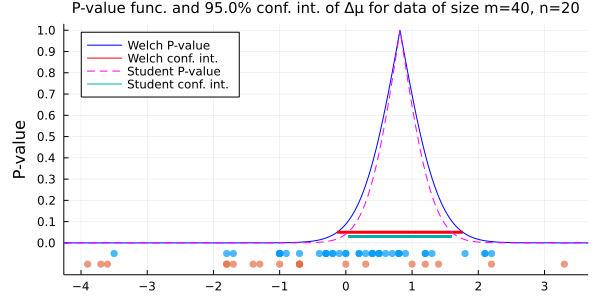

In [91]:
plot_confint_of_diffmeans(x, y; plot_pvaluefunc=true, plot_student=true,
    size=(600, 300), legend=:topleft)

### Studentの t 検定での第一種の過誤の確率の視覚化

以下のグラフを見ると, 等分散でなくても等サンプルサイズならばStudentの t 検定は使えそうに見える.

m = 40,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 40,  μ_y = 0.000,  σ_y = 2.000,  skewness_y = 0.000,  kurtosis_y = 0.000
Δμ = 0.0


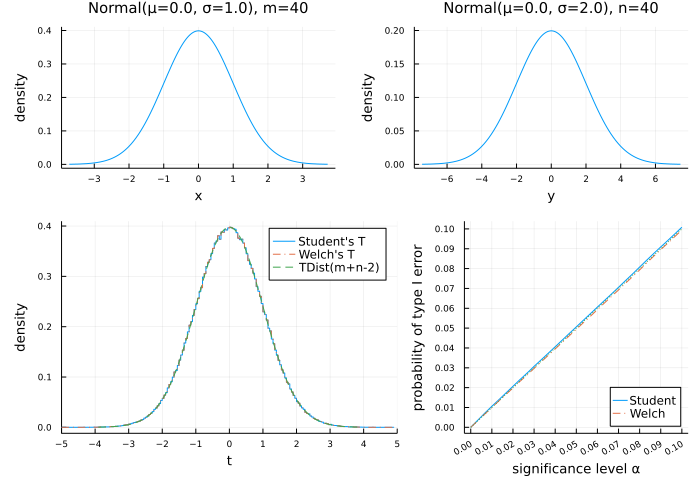

In [92]:
plot_student(distx=Normal(), m=40, disty=Normal(0,2), n=40)

しかし, 以下のように等分散でなくてかつ等サンプルサイズでない場合にはStudentの t 検定の方法では大きな誤差が生じてしまう.

m = 40,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 80,  μ_y = 0.000,  σ_y = 2.000,  skewness_y = 0.000,  kurtosis_y = 0.000
Δμ = 0.0


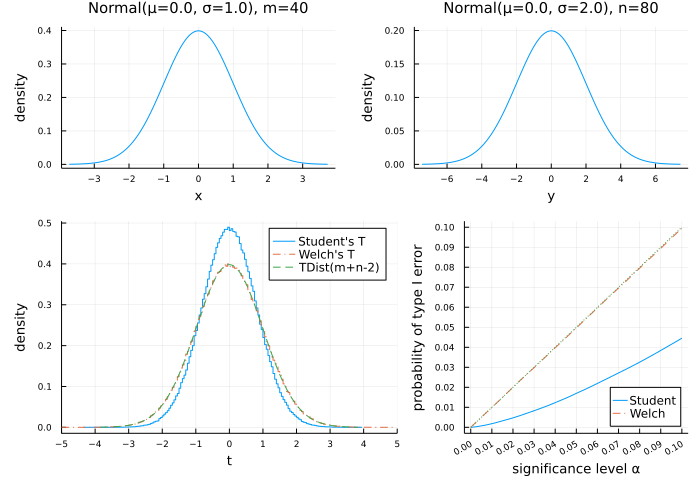

In [93]:
plot_student(distx=Normal(), m=40, disty=Normal(0,2), n=80)

m = 80,  μ_x = 0.000,  σ_x = 1.000,  skewness_x = 0.000,  kurtosis_x = 0.000
n = 40,  μ_y = 0.000,  σ_y = 2.000,  skewness_y = 0.000,  kurtosis_y = 0.000
Δμ = 0.0


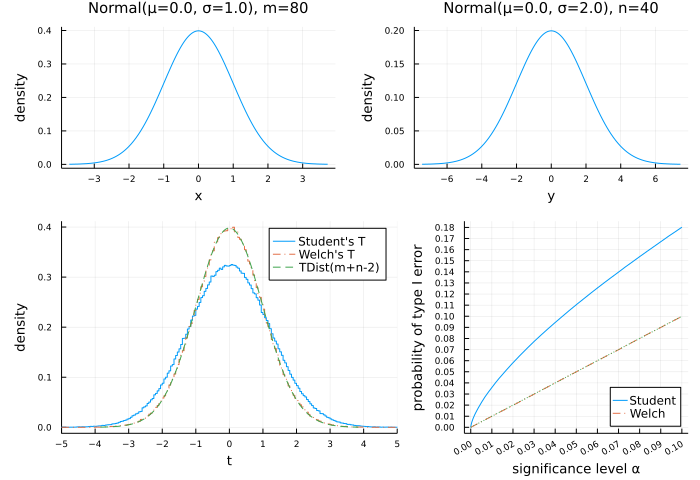

In [94]:
plot_student(distx=Normal(), m=80, disty=Normal(0,2), n=40)

以上の2つの場合にはStudentの t 検定の脆弱さとWelchの t 検定の頑健さが印象的である.

以下のように等サンプルサイズにすれば左右非対称で等分散でない場合にもStudentの t 検定は十分に使用可能なように見える.

m = 40,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 40,  μ_y = 6.000,  σ_y = 3.464,  skewness_y = 1.155,  kurtosis_y = 2.000
Δμ = 0.0


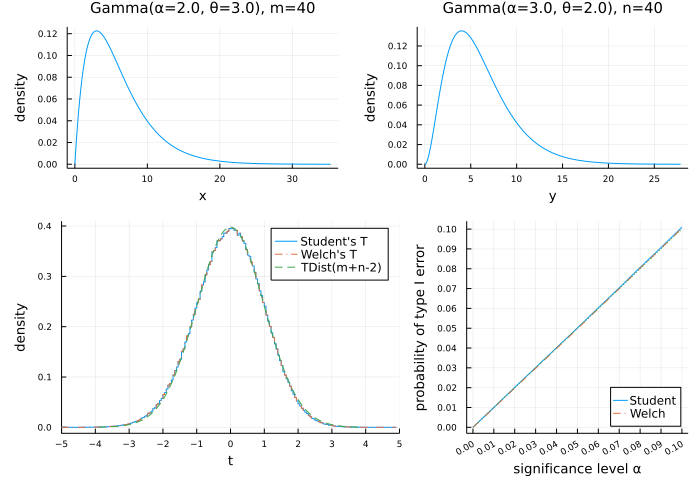

In [95]:
plot_student(distx=Gamma(2, 3), m=40, disty=Gamma(3,2), n=40)

m = 40,  μ_x = 6.000,  σ_x = 4.243,  skewness_x = 1.414,  kurtosis_x = 3.000
n = 50,  μ_y = 6.000,  σ_y = 3.464,  skewness_y = 1.155,  kurtosis_y = 2.000
Δμ = 0.0


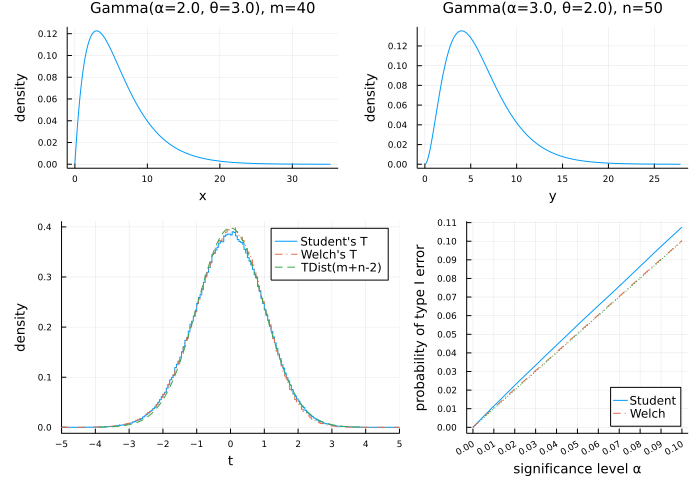

In [96]:
plot_student(distx=Gamma(2, 3), m=40, disty=Gamma(3,2), n=50)

このように等サンプルサイズに近くなるように($m=n$ に近くなるように)注意を払っていれば, Studentの t 検定も十分に実用的であると考えられる.